<a href="https://colab.research.google.com/github/Dynamixmoses/Dynamixmoses/blob/main/Moses_Olusola_Okesola_Recell_Project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

**Business Context**


Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $ 52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6%  from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

Objective
The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

Data Description
The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

brand_name: Name of manufacturing brand
os: OS on which the device runs
screen_size: Size of the screen in cm
4g: Whether 4G is available or not
5g: Whether 5G is available or not
main_camera_mp: Resolution of the rear camera in megapixels
selfie_camera_mp: Resolution of the front camera in megapixels
int_memory: Amount of internal memory (ROM) in GB
ram: Amount of RAM in GB
battery: Energy capacity of the device battery in mAh
weight: Weight of the device in grams
release_year: Year when the device model was released
days_used: Number of days the used/refurbished device has been used
normalized_new_price: Normalized price of a new device of the same model in euros
normalized_used_price: Normalized price of the used/refurbished device in euros



**Import Necessary Libraries**


In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)


# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Load the Dataset**

In [ ]:
Rcel = pd.read_csv("/Users/Moses Okesola/Downloads/used_device_data.csv")
Rcel.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
Rcel.T

,0,1,2,3,4,5,6,7,8,9,...,3444,3445,3446,3447,3448,3449,3450,3451,3452,3453
brand_name,Honor,Honor,Honor,Honor,Honor,Honor,Honor,Honor,Honor,Honor,...,Apple,Apple,Apple,Apple,Asus,Asus,Asus,Alcatel,Alcatel,Alcatel
os,Android,Android,Android,Android,Android,Android,Android,Android,Android,Android,...,iOS,iOS,iOS,iOS,Android,Android,Android,Android,Android,Android
screen_size,14.5,17.3,16.69,25.5,15.32,16.23,13.84,15.77,15.32,16.23,...,10.34,15.37,12.9,15.27,16.74,15.34,15.24,15.8,15.8,12.83
4g,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,...,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
5g,no,yes,yes,yes,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
main_camera_mp,13.0,13.0,13.0,13.0,13.0,13.0,8.0,13.0,13.0,13.0,...,12.0,8.0,8.0,8.0,NaN,NaN,13.0,13.0,13.0,13.0
selfie_camera_mp,5.0,16.0,8.0,8.0,8.0,8.0,5.0,8.0,16.0,8.0,...,7.0,7.0,7.0,7.0,24.0,8.0,8.0,5.0,5.0,5.0
int_memory,64.0,128.0,128.0,64.0,64.0,64.0,32.0,64.0,128.0,128.0,...,64.0,64.0,64.0,64.0,128.0,64.0,128.0,32.0,32.0,16.0
ram,3.0,8.0,8.0,6.0,3.0,4.0,2.0,4.0,6.0,6.0,...,3.0,4.0,4.0,4.0,8.0,6.0,8.0,3.0,2.0,2.0
battery,3020.0,4300.0,4200.0,7250.0,5000.0,4000.0,3020.0,3400.0,4000.0,4000.0,...,1821.0,3969.0,3046.0,3110.0,6000.0,5000.0,4000.0,4000.0,4000.0,4000.0


Check the shape of the dataset

In [ ]:
Rcel.shape


(3454, 15)

There are 3454 rows and 15 columns.

Get the information regarding column datatypes

In [ ]:
Rcel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

There are eleven numeric( nine float and two integer type) and four string( object type) columns in the dataset.

**List all the columns in the dataset**

In [ ]:
Rcel.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

**Get summary statistics for the dataset**

In [ ]:
Rcel.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


-The average normalized used devices price is approximately 4.4 Euros.

-The normalized used prices range from 1.54 to 6.6 Euros approximately.

-The normalized used median price is 4.4 Euros approximately which is comparable to its average value.

-The average normalized used price is 16.6% lesser than the normalized new price.

-The range of both the normalized used price and the normalized new price is the same, It is approximately 5 Euros.


**Check for duplicate values in the dataset**

In [ ]:
Rcel.duplicated().sum()

0

There are no duplicate values in the data

**Check for missing values in the dataset**

In [ ]:
Rcel.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

There are missing values in the following columns: main_camera_mp, selfie_camera_mp, int_memory, ram, battery,and weight.        

**Create a copy of the data so that the original data remain unchanged**

In [ ]:
df = Rcel.copy()

**Exploratory Data Analysis (EDA) Summary**

In [ ]:
# Get the list of all numerical variables, including 'normalized_used_price'
numerical_vars_all = Rcel.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Print the list of all numerical variables
print("All Numerical Variables:")
for var in numerical_vars_all:
    print(var)



All Numerical Variables:
screen_size
main_camera_mp
selfie_camera_mp
int_memory
ram
battery
weight
release_year
days_used
normalized_used_price
normalized_new_price


In [ ]:
# Extract features excluding the dependent variable 'normalized_used_price'
feature = Rcel.drop(columns=["normalized_used_price"])

# Check the extracted features
(feature.head()).T

,0,1,2,3,4
brand_name,Honor,Honor,Honor,Honor,Honor
os,Android,Android,Android,Android,Android
screen_size,14.5,17.3,16.69,25.5,15.32
4g,yes,yes,yes,yes,yes
5g,no,yes,yes,yes,no
main_camera_mp,13.0,13.0,13.0,13.0,13.0
selfie_camera_mp,5.0,16.0,8.0,8.0,8.0
int_memory,64.0,128.0,128.0,64.0,64.0
ram,3.0,8.0,8.0,6.0,3.0
battery,3020.0,4300.0,4200.0,7250.0,5000.0


The features are the independent variables of the dataset.

**Data visualization of numerical variables by histogram_boxplot**

In [ ]:
# Histogram-boxplot combined plots for numerical variables
def histogram_boxplot(Rcel, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    Rcel: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(data=Rcel, x=feature, ax=ax_box2, showmeans=True, color="violet")

    if bins:
        sns.histplot(data=Rcel, x=feature, kde=kde, ax=ax_hist2, bins=bins)
    else:
        sns.histplot(data=Rcel, x=feature, kde=kde, ax=ax_hist2)

    ax_hist2.axvline(Rcel[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    ax_hist2.axvline(Rcel[feature].median(), color="black", linestyle="-")  # Add median to the histogram


**Data visualization of categorical variables by labelled barplot**

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**normalized used price**

**Question:What does the distribution of normalized used device prices look like?**

In [ ]:
# the column that contains information about the normalized used prices
normalized_used_price_class = df["normalized_used_price"].unique()
normalized_used_price_class

array([4.30757245, 5.16209665, 5.11108377, ..., 5.03773152, 4.35734965,
       4.34976167])

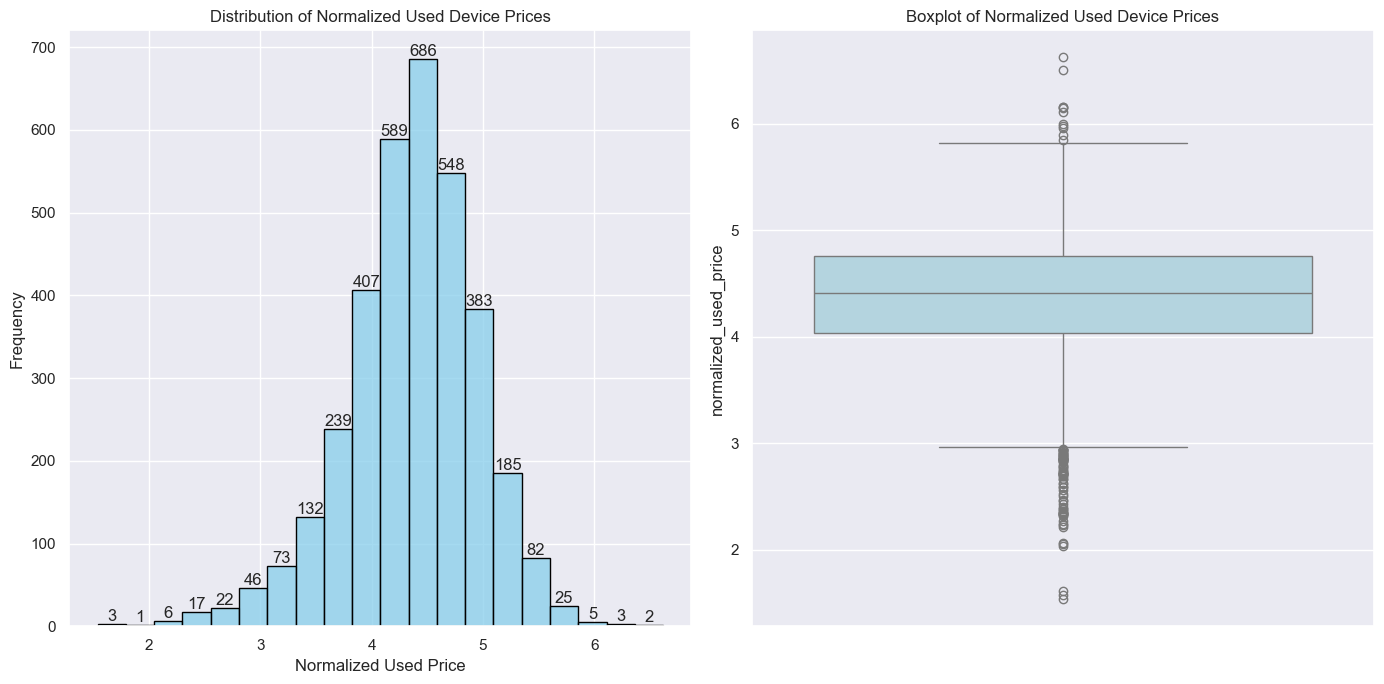

In [ ]:
# plotting the distribution of normalized used device prices

plt.figure(figsize=(14, 7))

# Subplot 1: Histogram of normalized used device prices with count labels
plt.subplot(1, 2, 1)
ax1 = sns.histplot(df["normalized_used_price"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Normalized Used Device Prices")
plt.xlabel("Normalized Used Price")
plt.ylabel("Frequency")

# Add count labels to the histogram
for rect in ax1.patches:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

# Subplot 2: Boxplot of normalized used device prices
plt.subplot(1, 2, 2)
ax2 = sns.boxplot(y="normalized_used_price", data=df, color="lightblue")
plt.title("Boxplot of Normalized Used Device Prices")

plt.tight_layout()
plt.show()



-The normalized used price distribution is normal.
-The least The normalized used devices price is slightly above 1.5 Euros.

-The lowest frequency of a normalized used devices price is 1 and at close to 2 Euros.

-The highest normalized used devices price is close to 7 Euros.

-The highest frequency of a normalized used devices price is 686 and at between 4.3 to 4.6 Euros.

-Extreme normalized used prices occured at slightly below 3 Euros and above 5.8 Euros.



**OS-Operating Systems**

In [ ]:
# the column that contains information about the operating systems
os_types = df["os"].unique()
os_types


array(['Android', 'Others', 'iOS', 'Windows'], dtype=object)

C:\Users\Moses Okesola\AppData\Local\Temp\ipykernel_112\2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


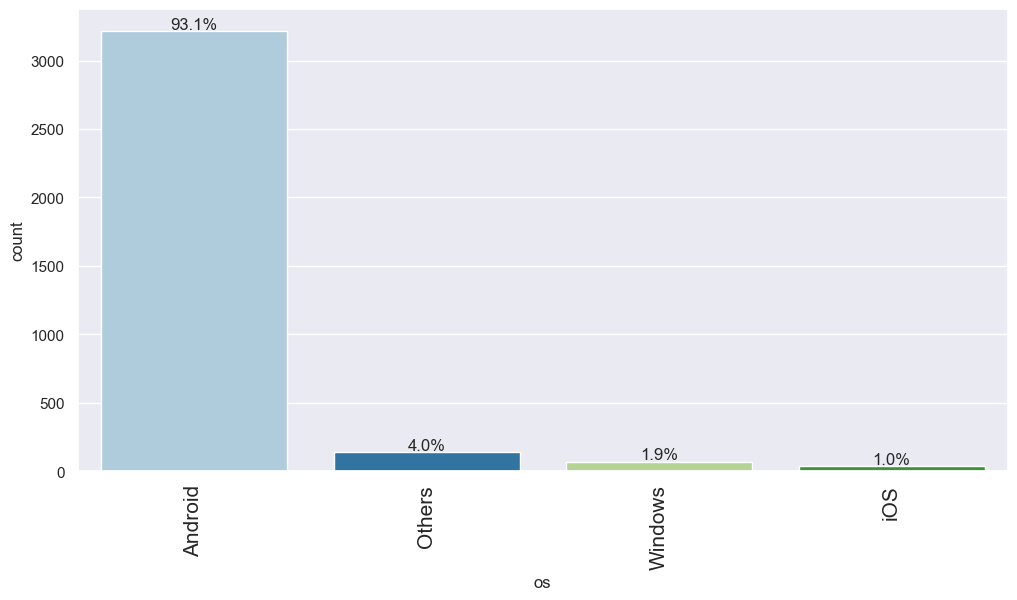

In [ ]:
# Plot the labeled barplot for the OS on which the device runs
labeled_barplot(df, "os", perc=True, n=10)

-OS Android-type is 93.1% of the market of used devices.

-OS Others-type is 4% of the market of used devices.

-OS Window-type is 1.9% of the market of used devices.

-OS IOS-type is 1% of the market of used devices.

**Question: What percentage of the used device market is dominated by Android devices?**

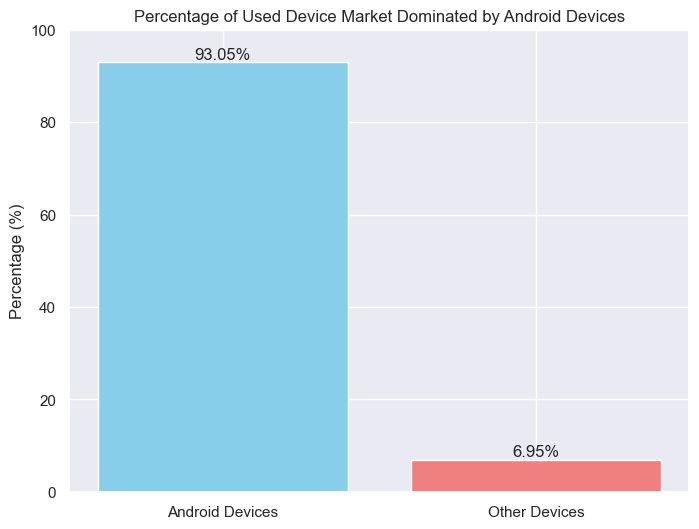

In [ ]:
# Calculate the percentage of the used device market dominated by Android devices
total_devices = len(df)
android_devices = len(df[df["os"] == "Android"])
android_market_share = (android_devices / total_devices) * 100

# Create a vertical bar plot to visualize the market share
plt.figure(figsize=(8, 6))
plt.bar(
    ["Android Devices", "Other Devices"],
    [android_market_share, 100 - android_market_share],
    color=["skyblue", "lightcoral"],
)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Used Device Market Dominated by Android Devices")
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100 for percentage scale

# Display the percentage values on the bars
for index, value in enumerate([android_market_share, 100 - android_market_share]):
    plt.text(index, value, f"{value:.2f}%", ha="center", va="bottom")

plt.show()

The percentage of the used devices market dominated by Android devices is 93.05%, and that of other operating system categories is 6.95%.

**RAM**

In [ ]:
# the column that contains information about the RAM
ram_sizes = df["ram"].unique()
ram_sizes

array([ 3.  ,  8.  ,  6.  ,  4.  ,  2.  ,  1.  , 12.  ,  0.5 ,  0.25,
        0.03,   nan,  0.02,  1.5 ])

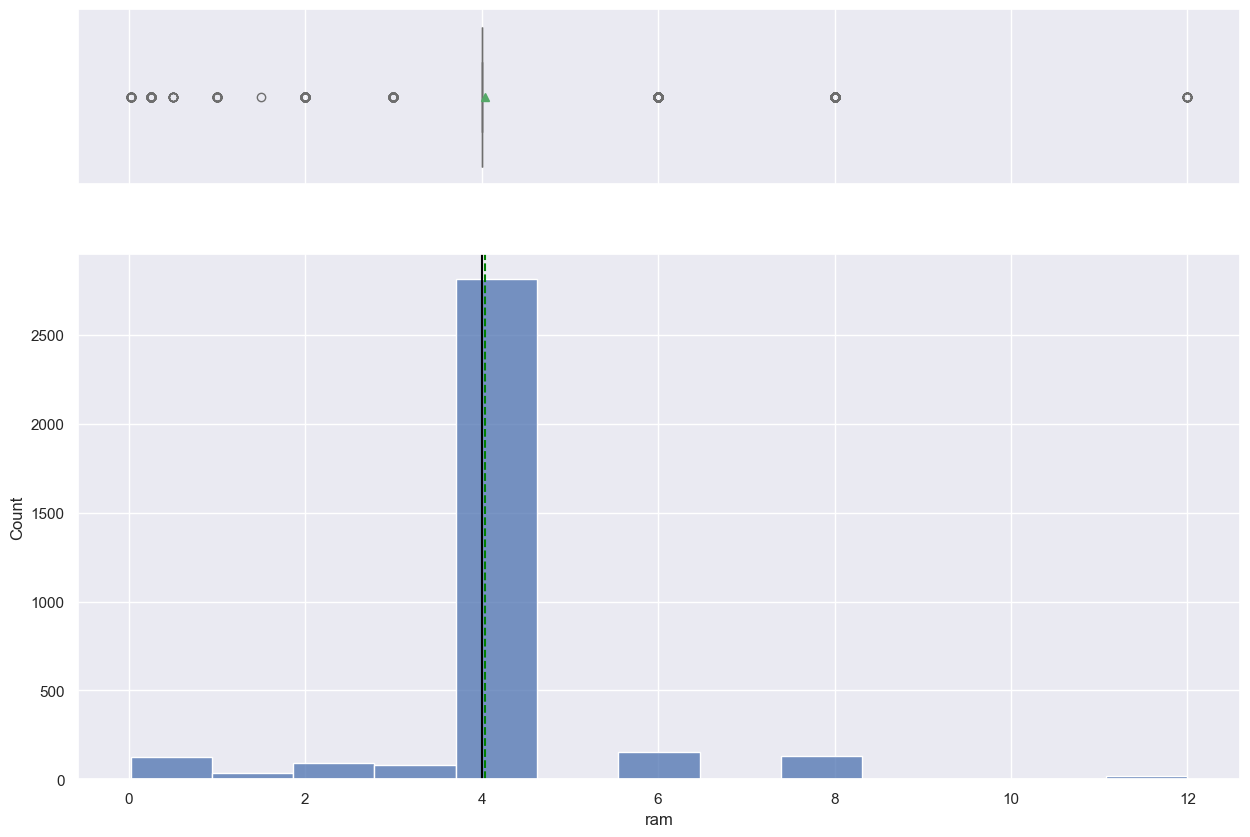

In [ ]:
# Plot the histogram and boxplot for amount of RAM
histogram_boxplot(df, "ram")

-The distribution of RAM is right-skewed with a few scattered extreme values on both sides of the plot.


**Sreen size**

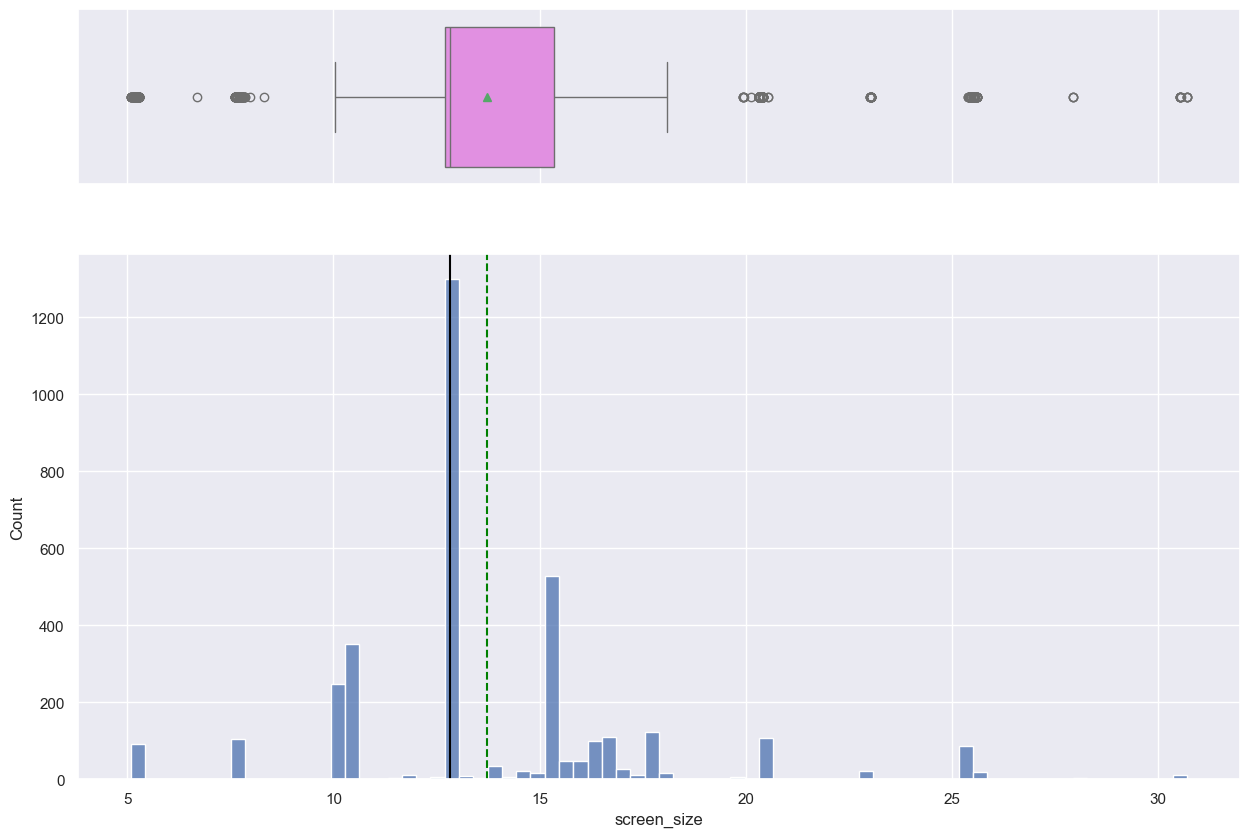

In [ ]:
# Plot the histogram and boxplot for the screen size
histogram_boxplot(df, "screen_size")

The distribution of screen_size is right-skewed with some outliers on both sides of the plot.


**Normalized new price**

In [ ]:
# the column that contains information about the normalized new prices
normalized_new_price_class = df["normalized_new_price"].unique()
normalized_new_price_class

array([4.71510025, 5.51901794, 5.88463072, ..., 6.25153773, 4.62418819,
       4.27999391])

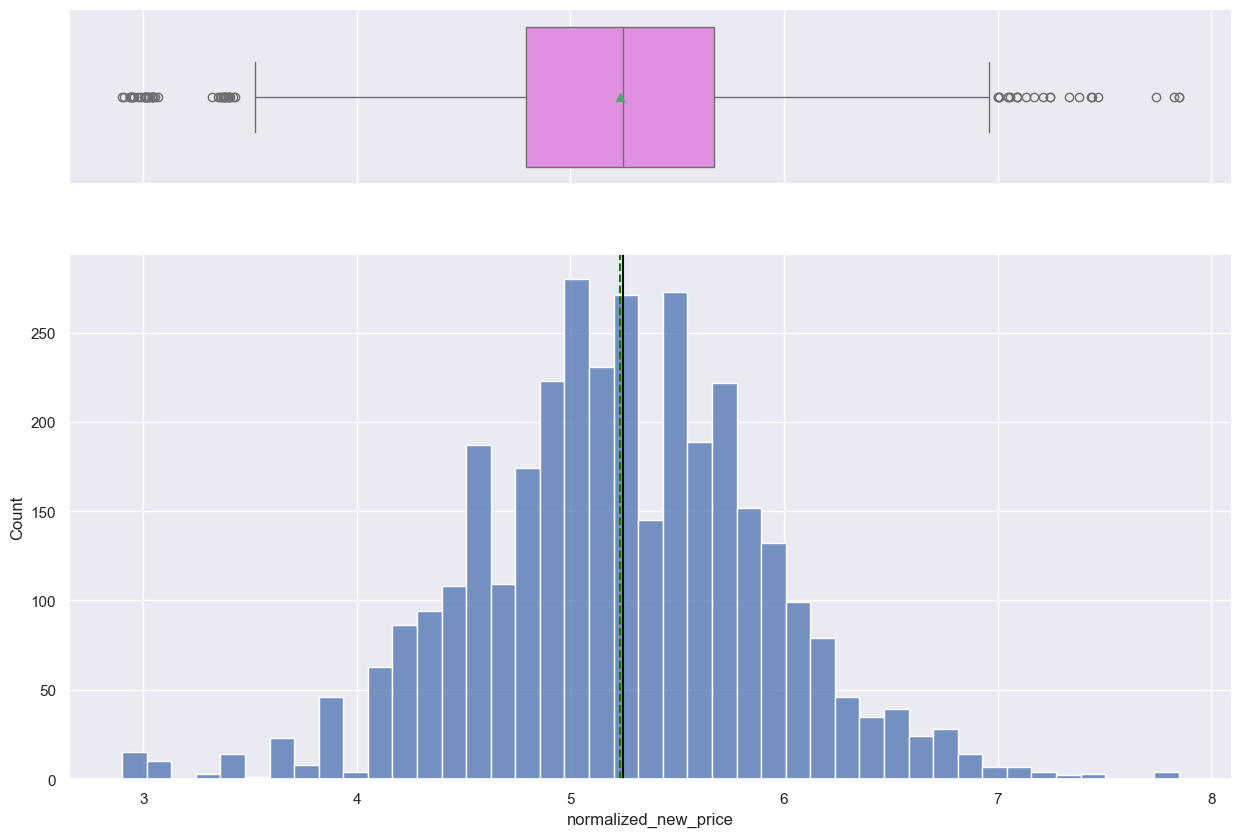

In [ ]:
# plot the histogram-boxplot for Normalized price of a new device of the same model
histogram_boxplot(df, "normalized_new_price")

normalized_new_price distribution is normal with outliers on both sides of the plot.

**Main camera mp: the resolution of the rear camera**

In [ ]:
# the column that contains information about the resolution of the rear camera
main_camera_mp_types = df["main_camera_mp"].unique()
main_camera_mp_types

array([13.  ,  8.  ,  5.  , 10.5 ,  3.15,   nan,  2.  , 16.  ,  0.3 ,
       12.  , 14.5 , 48.  ,  3.  , 21.  ,  1.3 , 13.1 , 24.  ,  0.08,
       20.7 , 23.  ,  1.  , 18.  , 12.2 , 12.3 , 20.  , 20.2 ,  4.  ,
       12.5 , 10.  ,  6.5 ,  6.7 , 41.  , 20.1 , 12.6 , 16.3 , 22.6 ,
       19.  , 21.5 , 21.2 ,  8.1 ,  1.2 , 22.5 ])

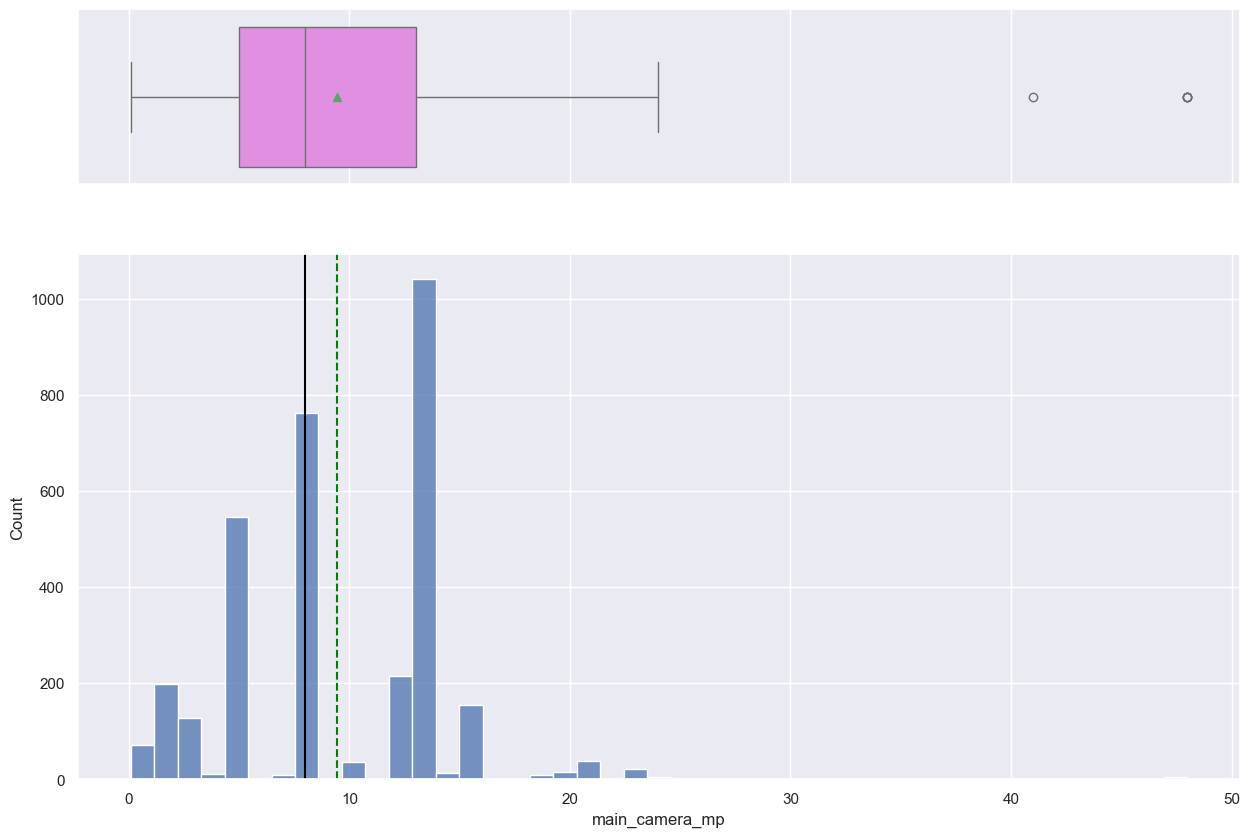

In [ ]:
# Plot the histogram and boxplot for the resolution of the rear camera
histogram_boxplot(df, "main_camera_mp")

 main_camera_mp distribution is right-skewed with less than 0 minimum value and a maximum value of slightly above 22 megapixels.

**Selfie camera mp: the resolution of the front camera**

In [ ]:
# the column that contains information about the resolution of the frontcamera
selfie_camera_mp_types = df["selfie_camera_mp"].unique()
selfie_camera_mp_types

array([ 5.  , 16.  ,  8.  , 32.  ,  2.  ,  0.3 , 13.  , 14.5 , 24.  ,
       10.  ,  1.3 , 20.  , 25.  ,  0.  , 12.  ,  7.  ,  1.2 ,  3.  ,
        2.1 ,  1.  ,  4.  ,  1.1 ,   nan, 10.5 ,  1.6 ,  1.8 ,  3.5 ,
        0.9 ,  1.25, 18.  ,  1.9 ,  9.  ,  3.7 , 16.3 ,  5.1 ,  2.2 ,
       14.  ,  0.65])

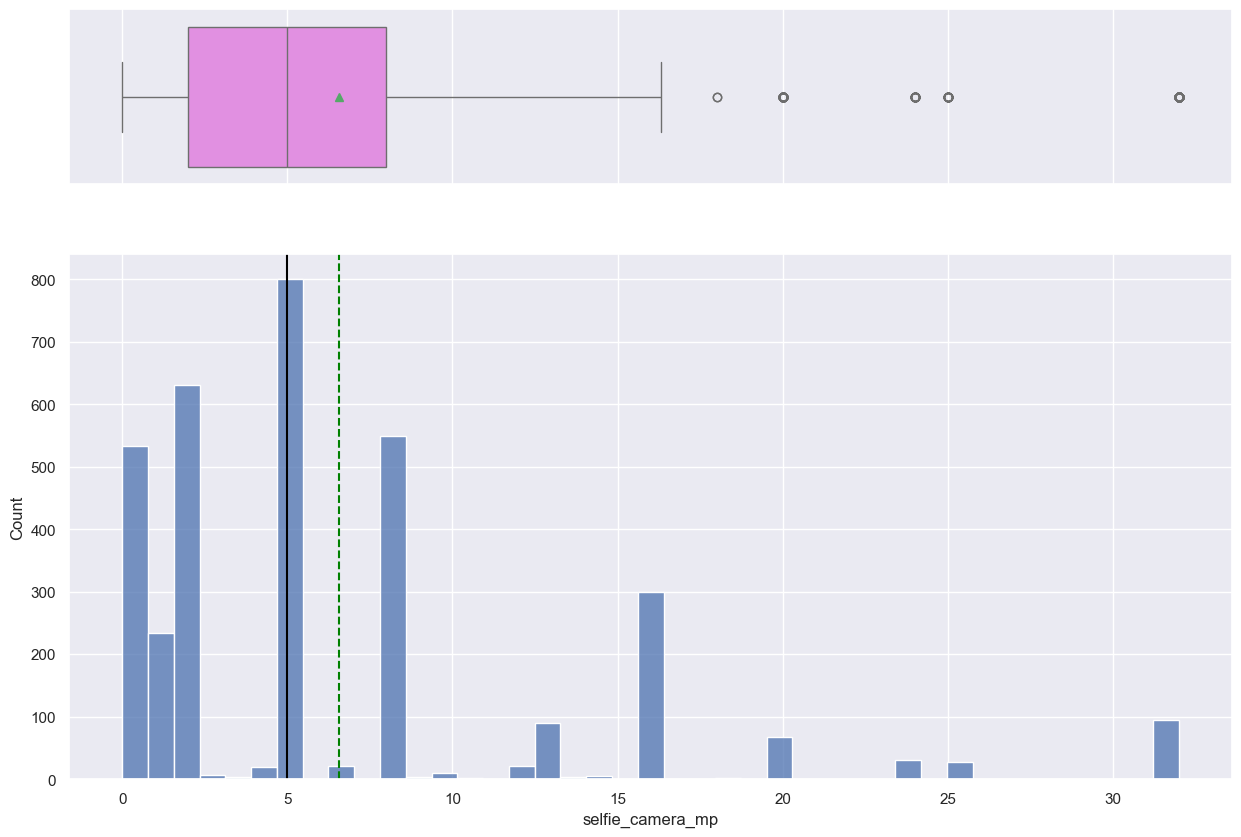

In [ ]:
# Plot the histogram and boxplot for the resolution of the front camera
histogram_boxplot(df, "selfie_camera_mp")

 -selfie_camera_mp distribution is right-skewed with 0 minimum value and a maximum value above 31 megapixels.
 -There are a few extreme values to right of the distribution.

**Internal Memory**

In [ ]:
# the column that contains information about the internal memory
int_memory_sizes = df["int_memory"].unique()
int_memory_sizes

array([6.400e+01, 1.280e+02, 3.200e+01, 1.600e+01, 2.560e+02, 5.120e+02,
       8.000e+00, 4.000e+00, 5.000e-01, 2.000e-01, 1.000e-01, 6.000e-02,
             nan, 1.024e+03, 2.400e+01, 1.000e-02])

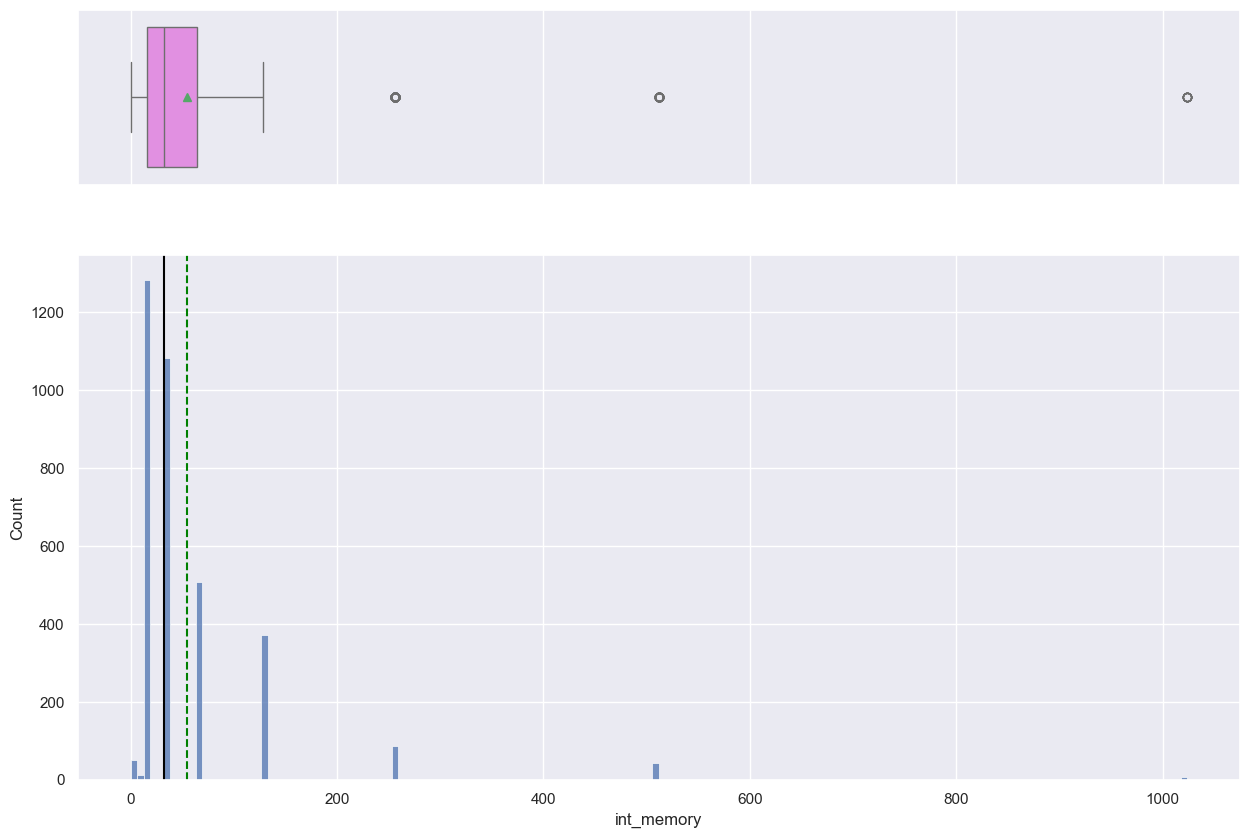

In [ ]:
# Plot the histogram and boxplot for the internal memory of the device
histogram_boxplot(df, "int_memory")

 Internal memory distribution is right skewed with a few staggered extreme values. The least int_memory value is approximately zero.

**Weight of the device in grams**

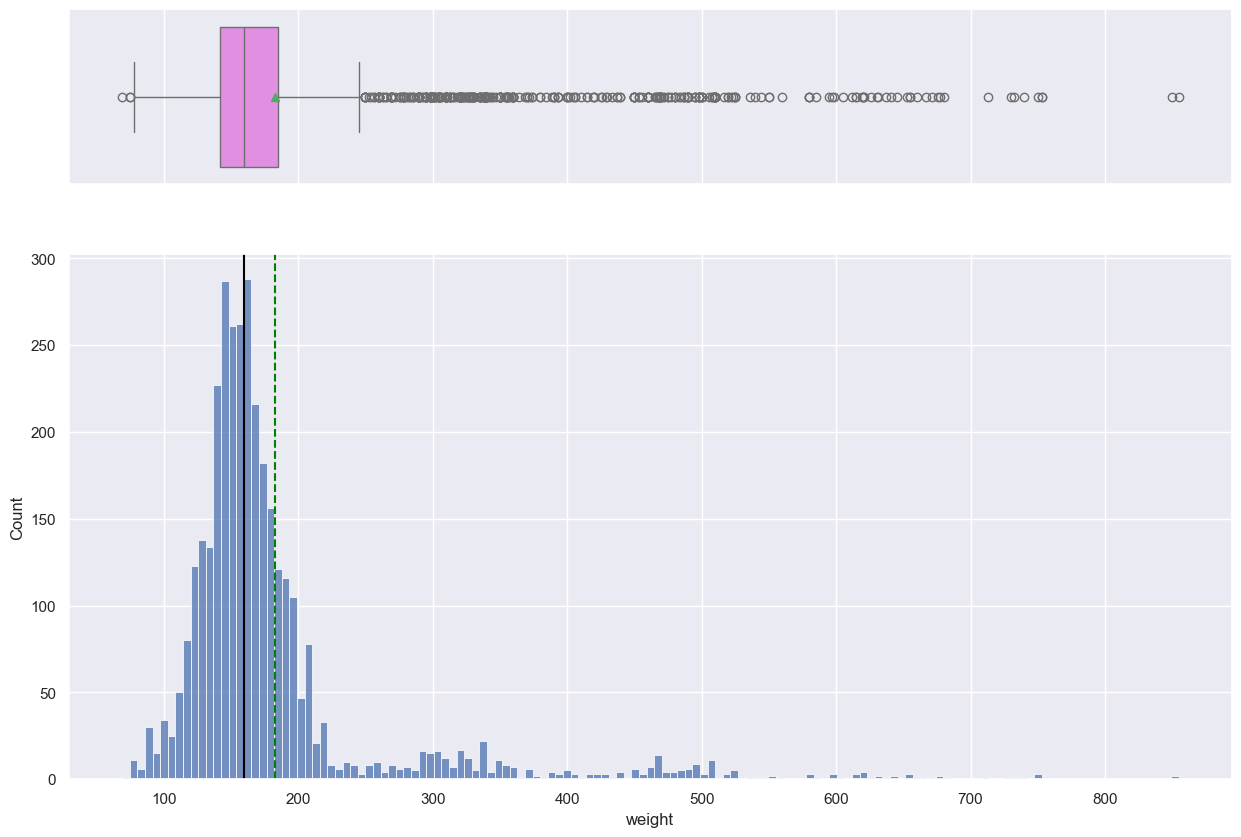

In [ ]:
# Plot the histogram and boxplot for the weight of the device
histogram_boxplot(df, "weight")

The weight of the device is right-skewed with a very high extreme values at the right side of the plot, though there a few extreme values at the left.

**battery: Energy capacity of the device battery in mAh**

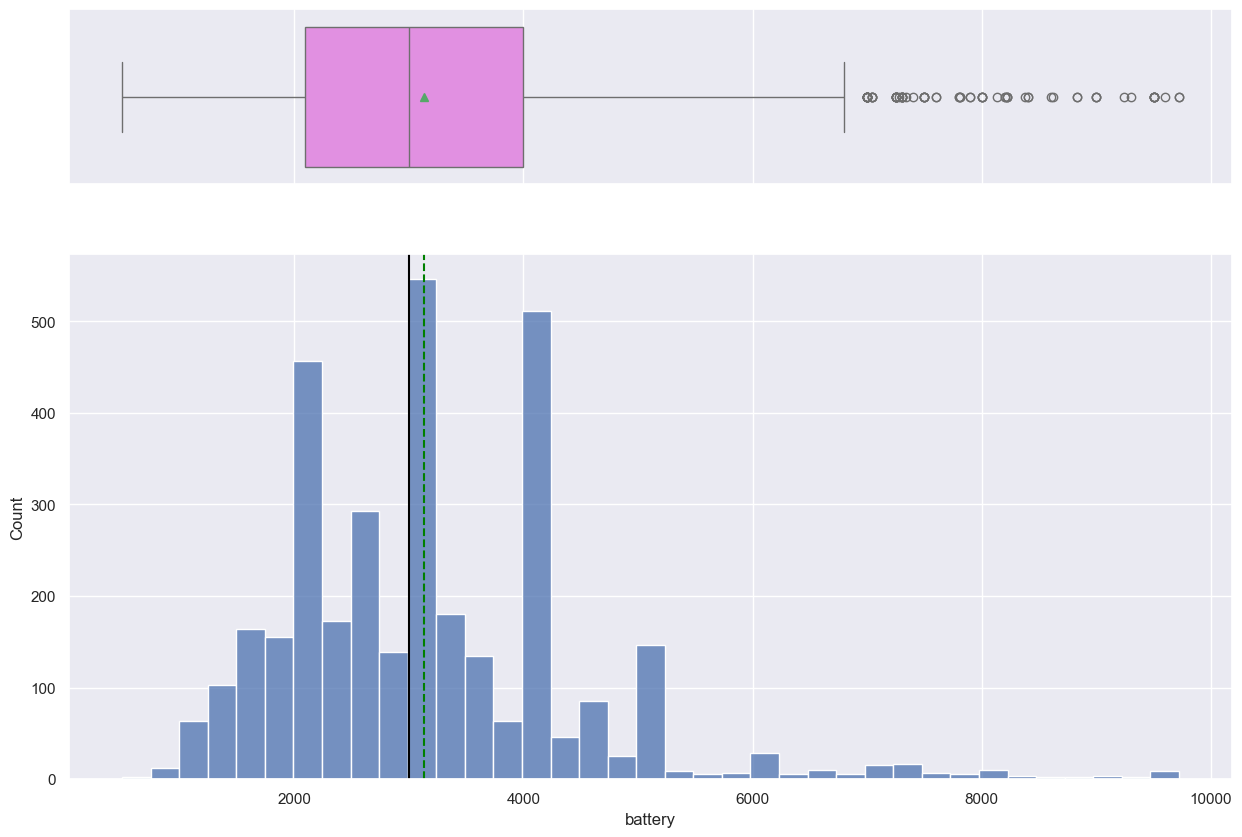

In [ ]:
# Plot the histogram and boxplot for the Energy capacity of the device battery
histogram_boxplot(df, "battery")

The distribution of the Energy capacity of the device battery is right-skewed with a lot of outliers at the right side of the plot.

**Days used : Number of days the used/refurbished device has been used**

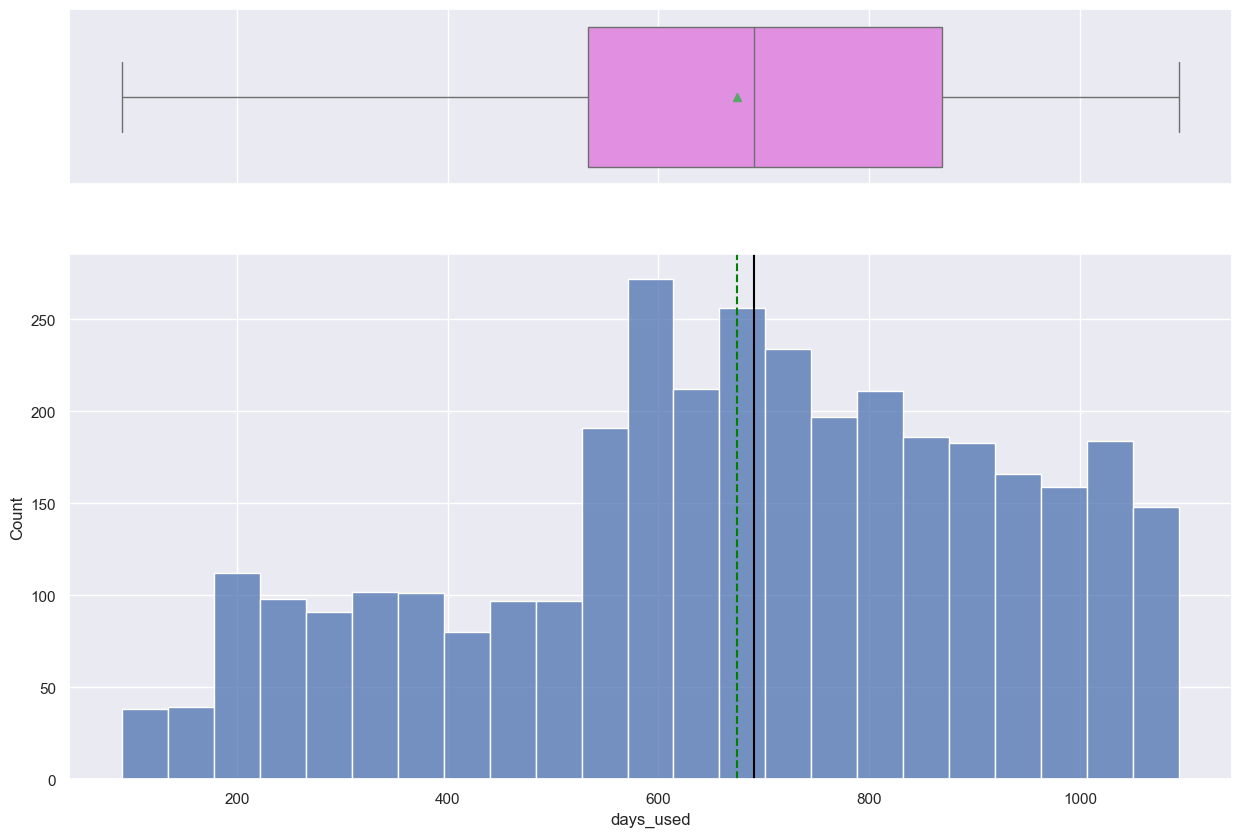

In [ ]:
# Plot the histogram and boxplot for the number of days the used/refurbished device has been used
histogram_boxplot(df, "days_used")

The distribution of the number of days the used/refurbished device has been used is slightly right-skewed without any extreme value.

**brand_name**

C:\Users\Moses Okesola\AppData\Local\Temp\ipykernel_112\2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


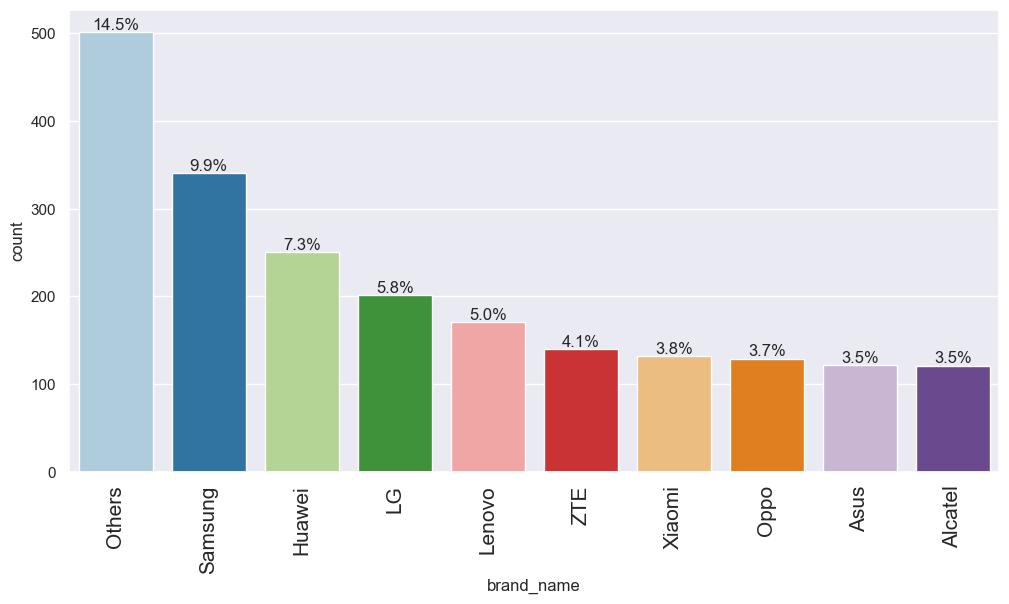

In [ ]:
# Plot the labeled barplot for the name of manufacturing brand
labeled_barplot(df, "brand_name", perc=True, n=10)

-The brand name distribution shows the percentage of market share of each manufacturing brand.

**4g**

C:\Users\Moses Okesola\AppData\Local\Temp\ipykernel_112\2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


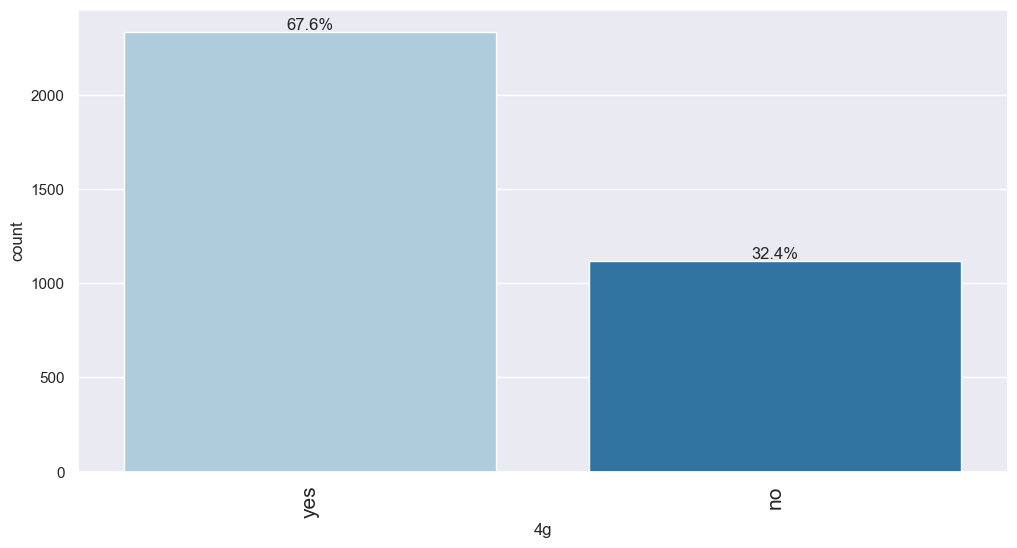

In [ ]:
# Plot the labeled barplot for the name of manufacturing brand
labeled_barplot(df, "4g", perc=True, n=10)

-There is 67.7% availability of the 4g devices in the market.

-There is 32.4% non-availability of the 4g devices in the market.

**5g**

C:\Users\Moses Okesola\AppData\Local\Temp\ipykernel_112\2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


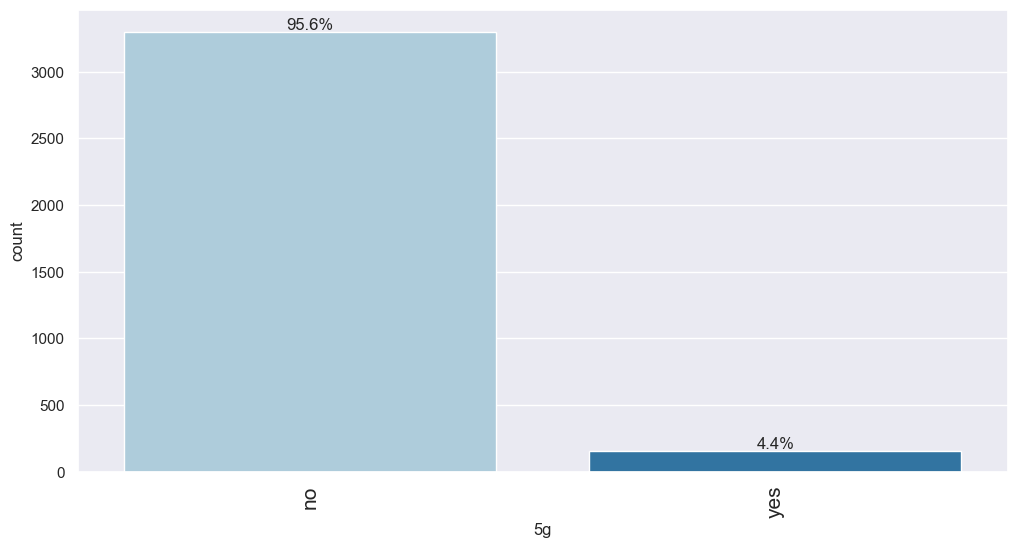

In [ ]:
# Plot the labeled barplot for the name of manufacturing brand
labeled_barplot(df, "5g", perc=True, n=10)

-There is 4.4% availability of the 5g devices in the market.

-There is 95.6% non-availability of the 5g devices in the market.

**os**

C:\Users\Moses Okesola\AppData\Local\Temp\ipykernel_112\2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


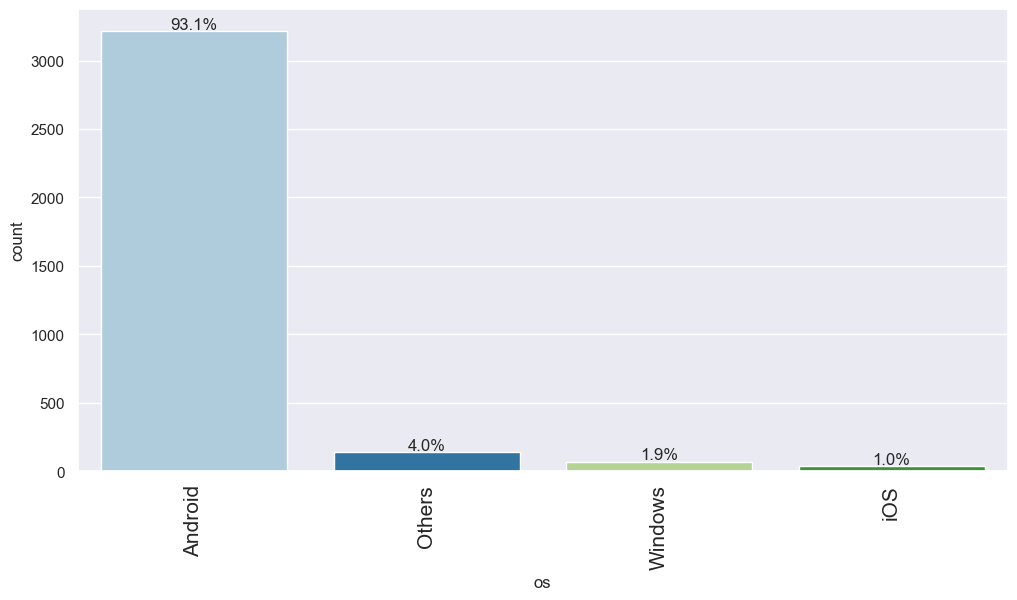

In [ ]:
# Plot the labeled barplot for the operating system of the devices
labeled_barplot(df, "os", perc=True, n=10)

-Android operating system devices account for 93.1% of the market,which is the highest.

-The least in the market is the iOS operating system devices.

**release_year: Year when the device model was released**

C:\Users\Moses Okesola\AppData\Local\Temp\ipykernel_112\2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


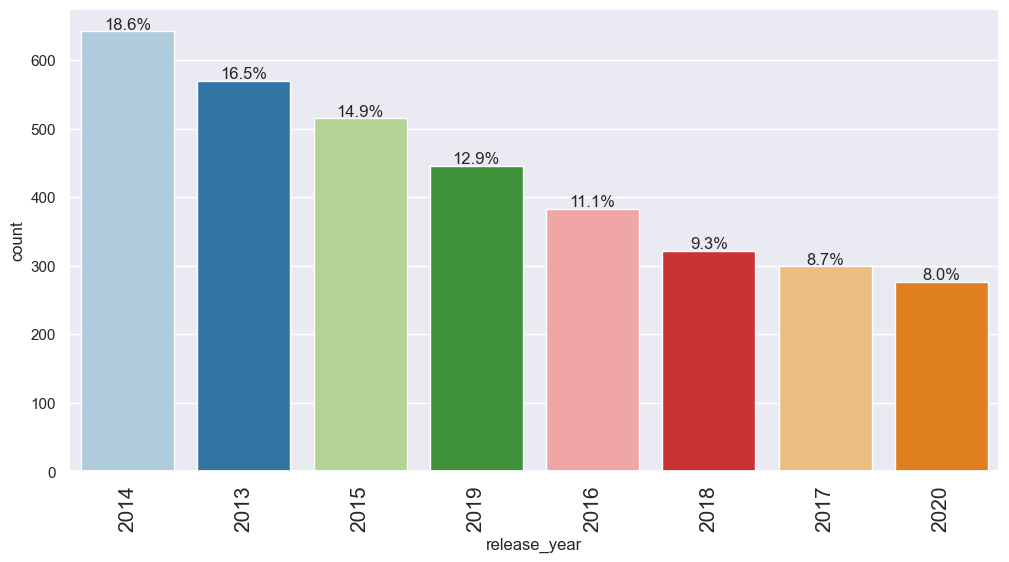

In [ ]:
# Plot the labeled barplot for the year when the device model was released
labeled_barplot(df, "release_year", perc=True, n=10)

-The plot indicates that a higher percentage (18.6%) of phone and tablet devices were released in 2014 compared to other years in the range.

-There is a drop in the percentage of releases by the year 2020 (8%), suggesting a decrease in the number of device releases over time.

**Bivariate Analysis**

**Correlation check**

**Question: Which attributes are highly correlated with the normalized price of a used device?**

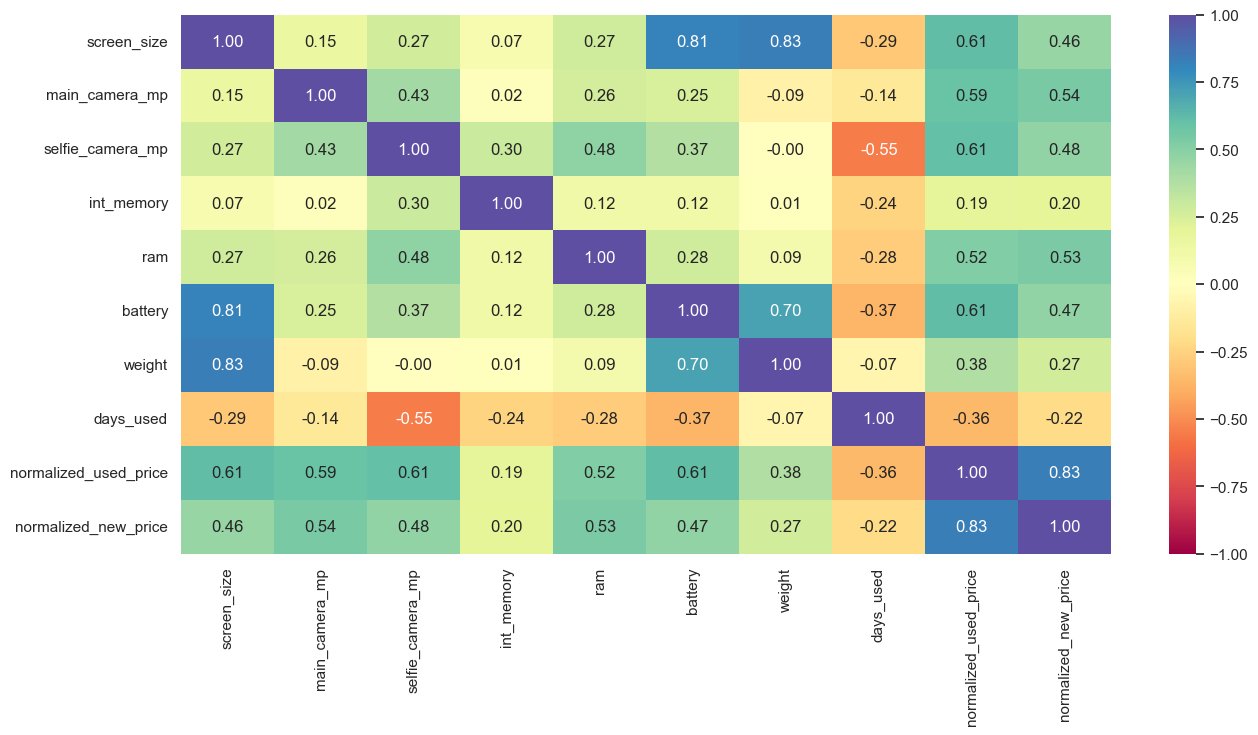

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

-normalized_used_price has moderate positive corellation with screen_size, main_camera_mp, selfie_camera_mp, ram,battery,and strong positive correlation with normalized_new_price.

-The correlation between normalized_used_price and int_memory, and weight is weakly positive.

-normalized_used_price has weak negative correlation with days_used.


**Plot the scatterplots for numerical features and the target variable, normalized_used_price**

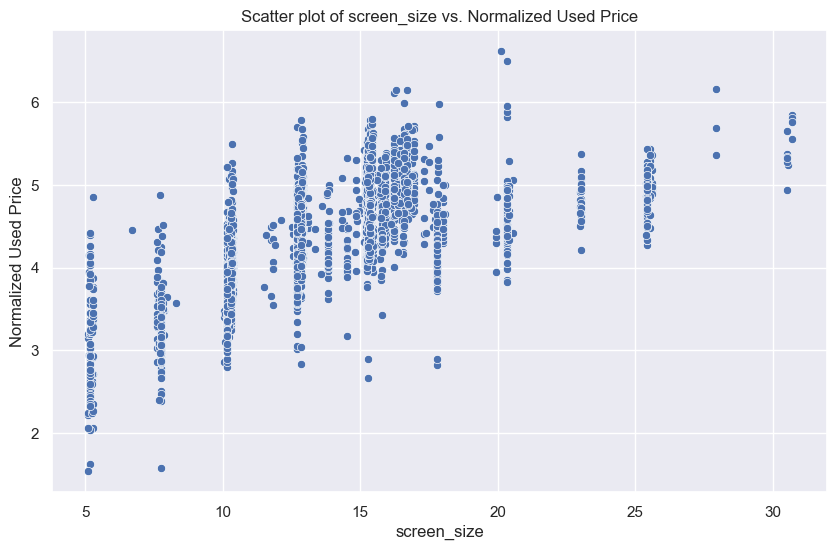

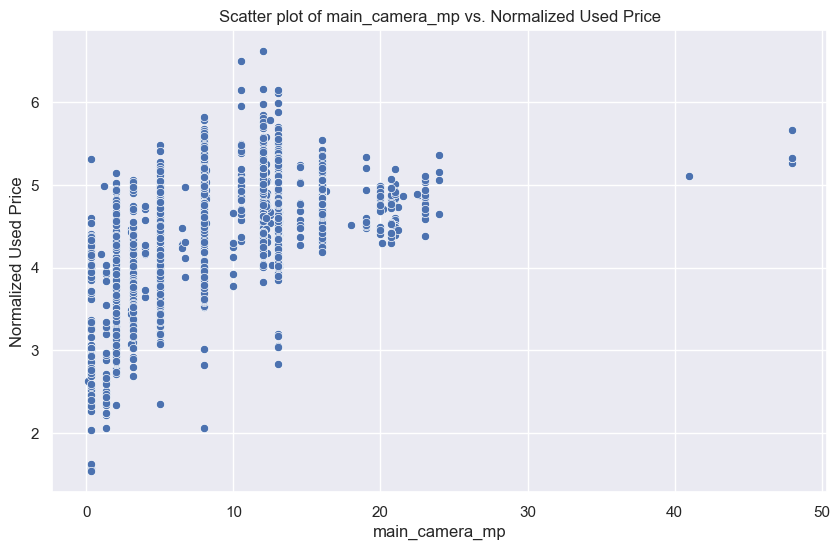

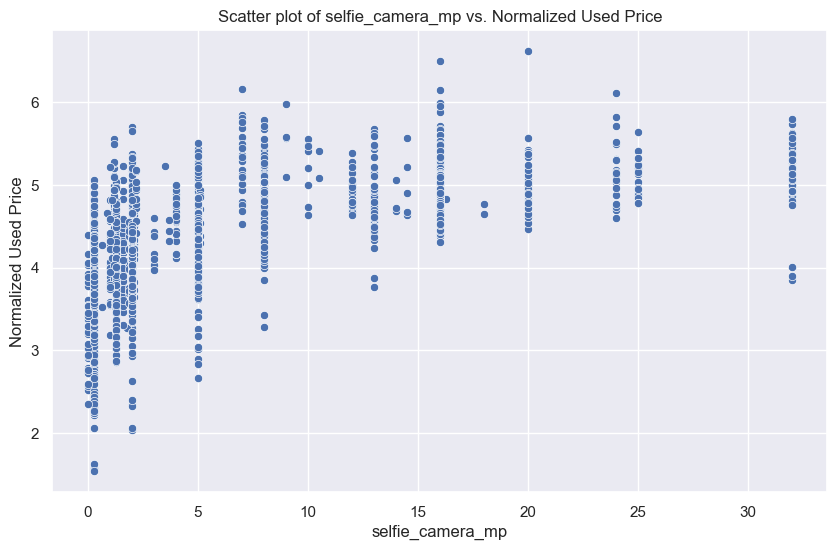

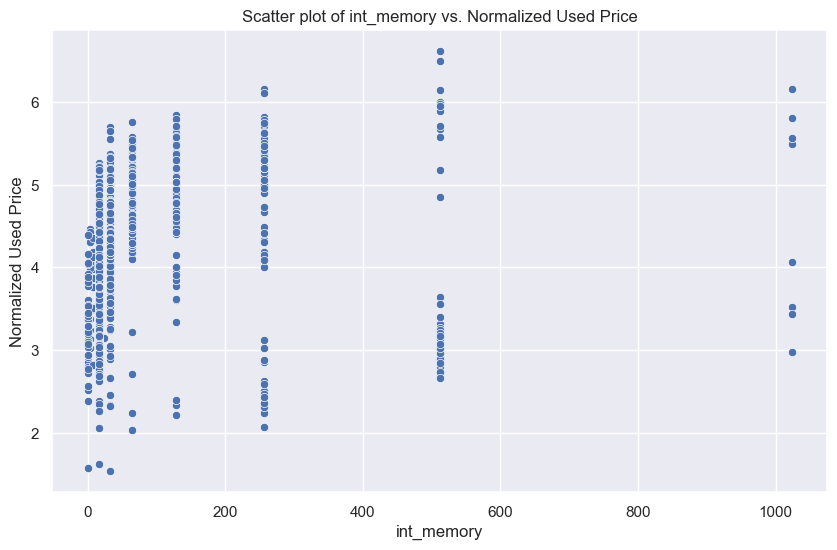

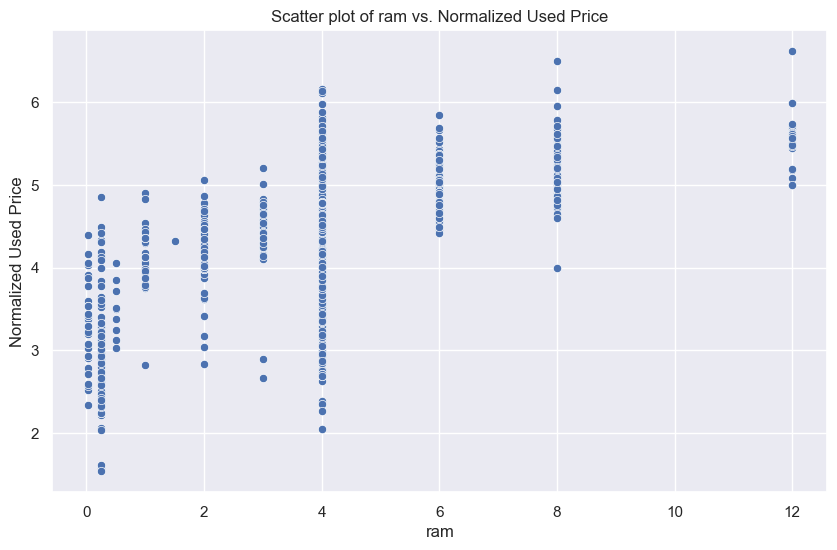

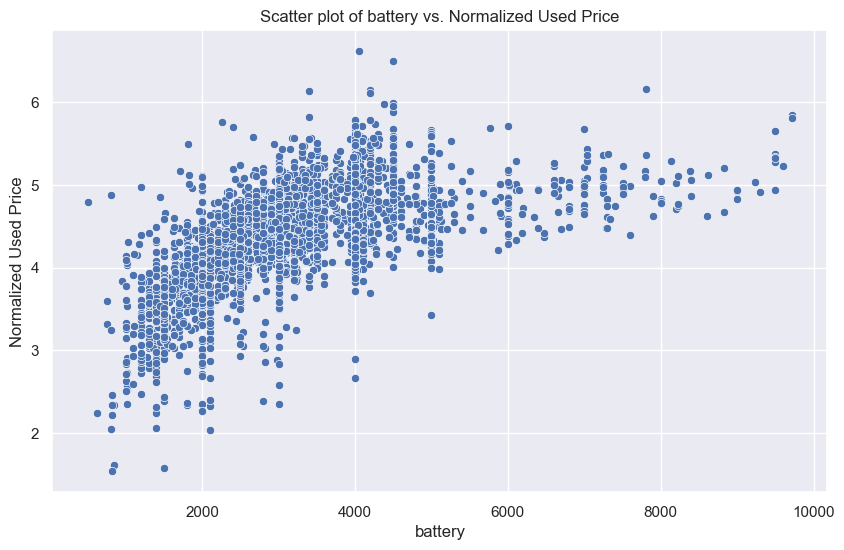

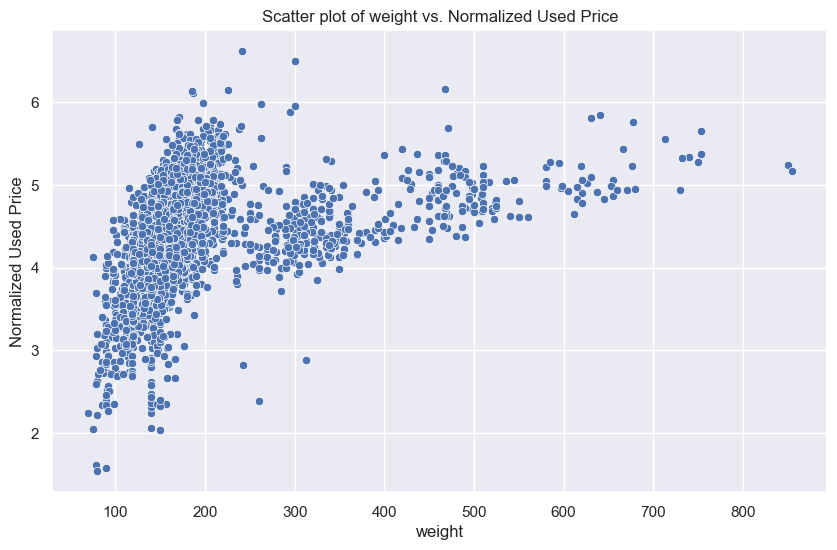

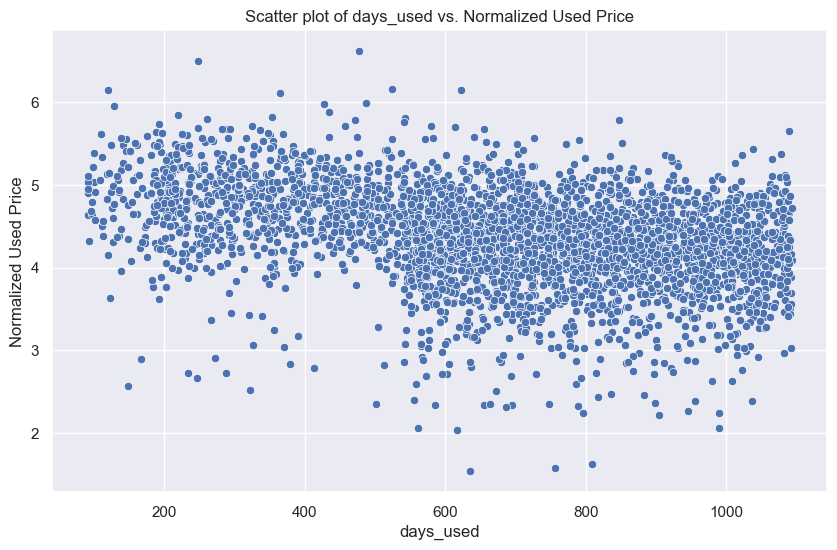

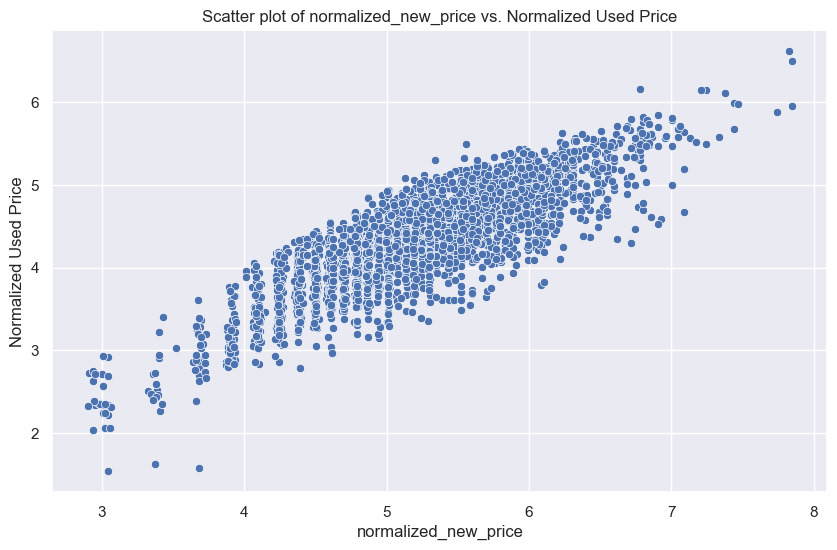

In [ ]:
# Get the list of all numerical variables, excluding 'normalized_used_price' and 'release_year'
numerical_vars_all = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
numerical_vars = [var for var in numerical_vars_all if var not in ["normalized_used_price", "release_year"]]

# Creating scatter plots for each numerical feature against the normalized used price
for feature in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=feature, y="normalized_used_price")
    plt.title(f"Scatter plot of {feature} vs. Normalized Used Price")
    plt.xlabel(feature)
    plt.ylabel("Normalized Used Price")
    plt.show()



normalized_used_price vs numerical variables shows no linear relationship.

**Plot of normalized used price vs categorical variables**

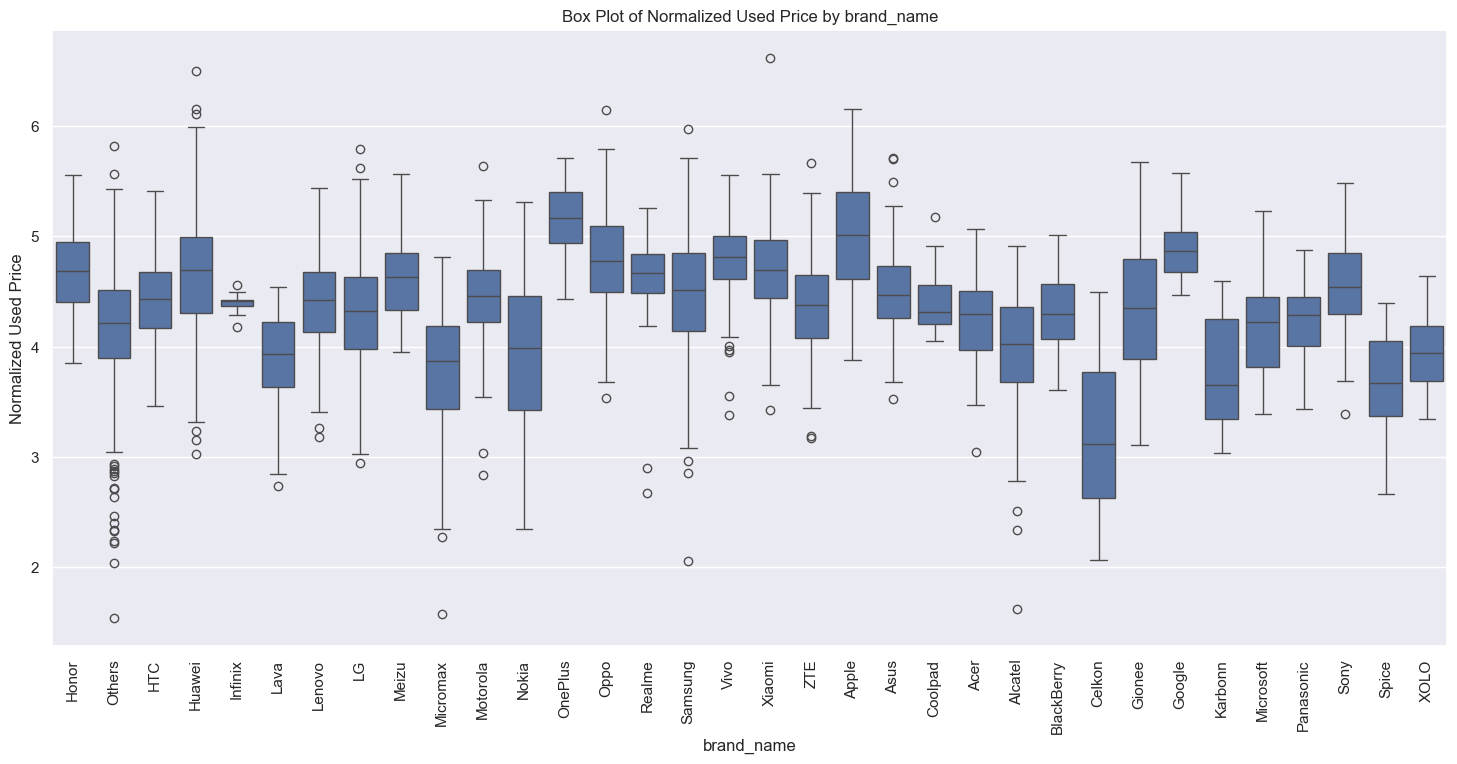

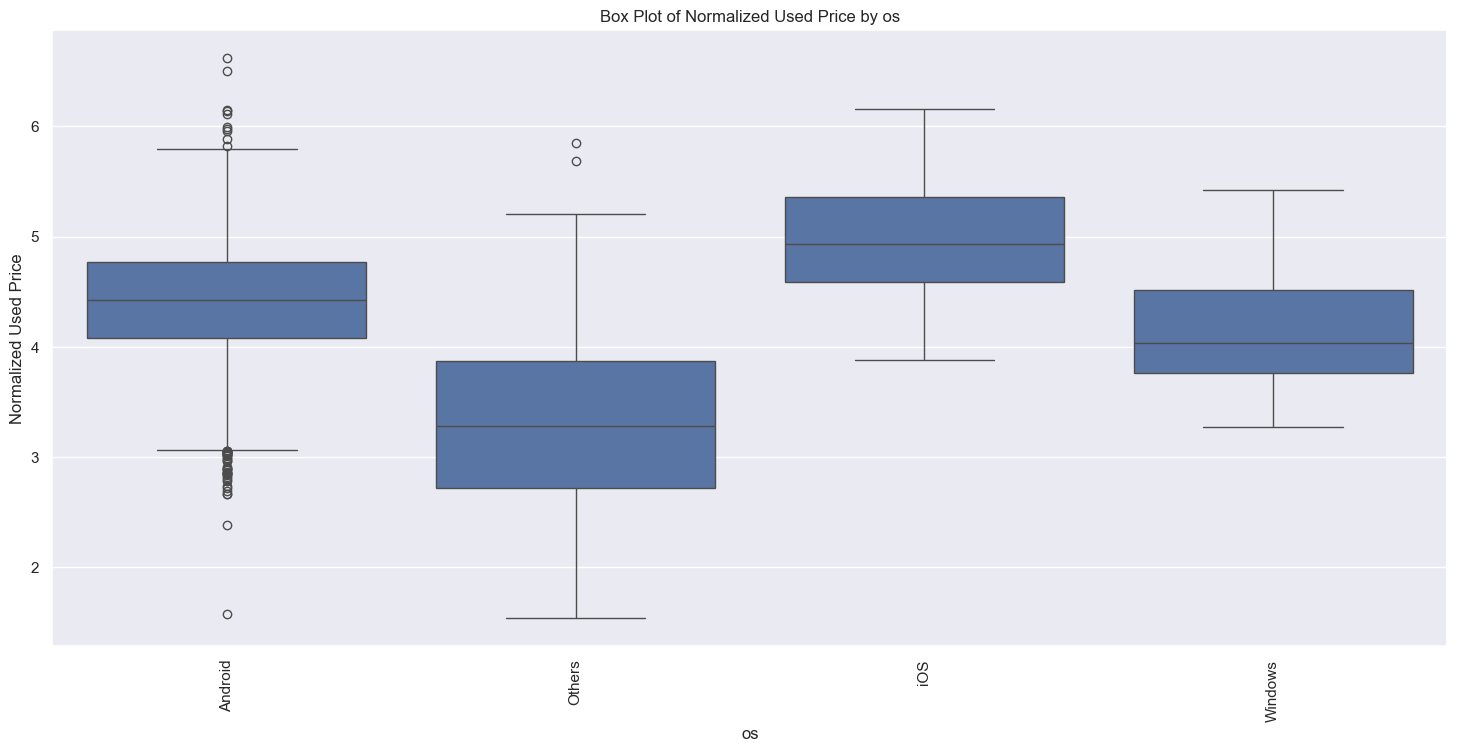

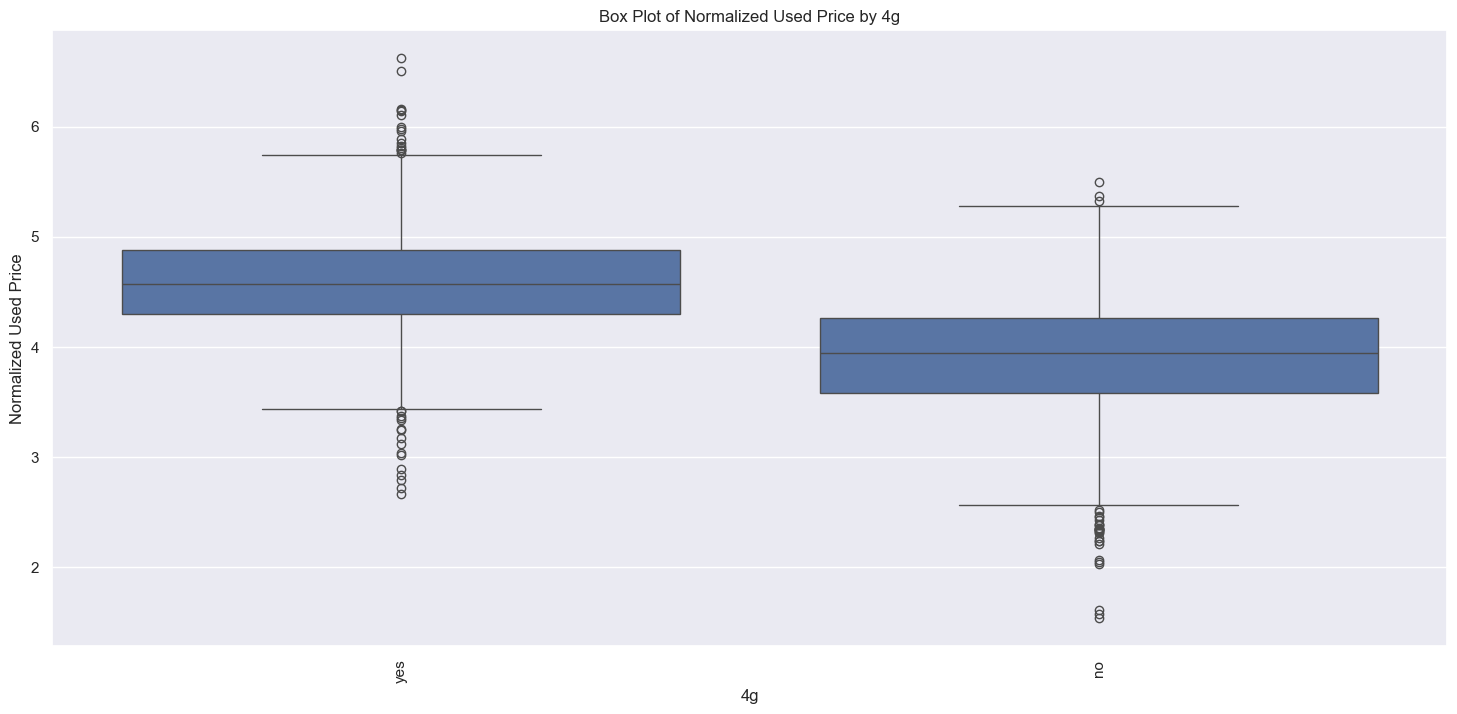

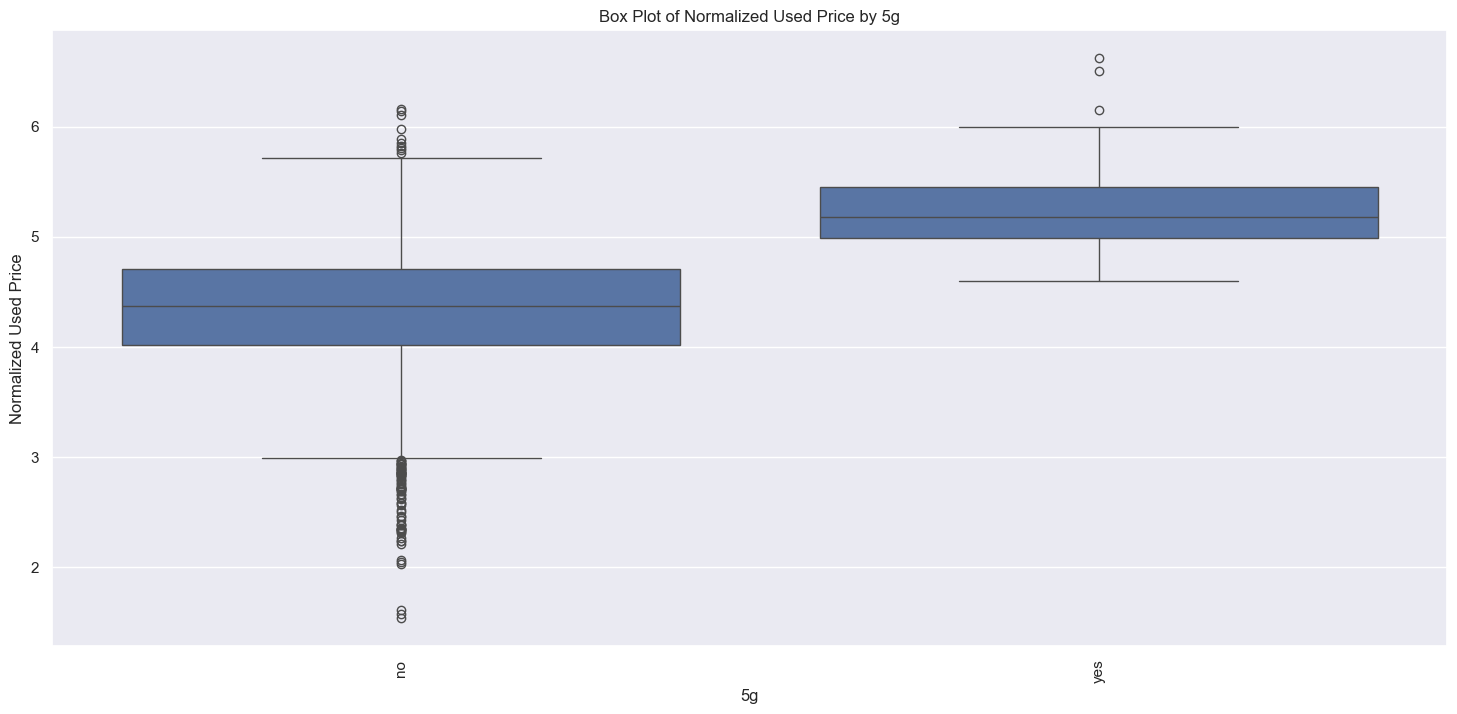

In [ ]:
# Create a box plot of the normalized used price versus categorical variables
cat_vars = df.select_dtypes(include=["object", "category"]).columns.tolist()
for feature in cat_vars:
    plt.figure(figsize=(18, 8))  # Set the figure size for each plot
    sns.boxplot(x=feature, y="normalized_used_price", data=df, width=0.8)
    plt.title(f"Box Plot of Normalized Used Price by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Normalized Used Price")
    plt.xticks(rotation=90)
    plt.show()  # Display the plot in each iteration of the loop

-Apple phone and tablet used devices has the highest normalized used price and celkon has the lowest.

-IOS-OS type has the highest normalized used price and Others-OS type has the lowest.

-Devices with 4g attracts higher normalized used price than used devices with no 4g.

-Devices with 5g attracts higher normalized used price than used devices with no 5g.

**Brand name vs RAM**

**Question: The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

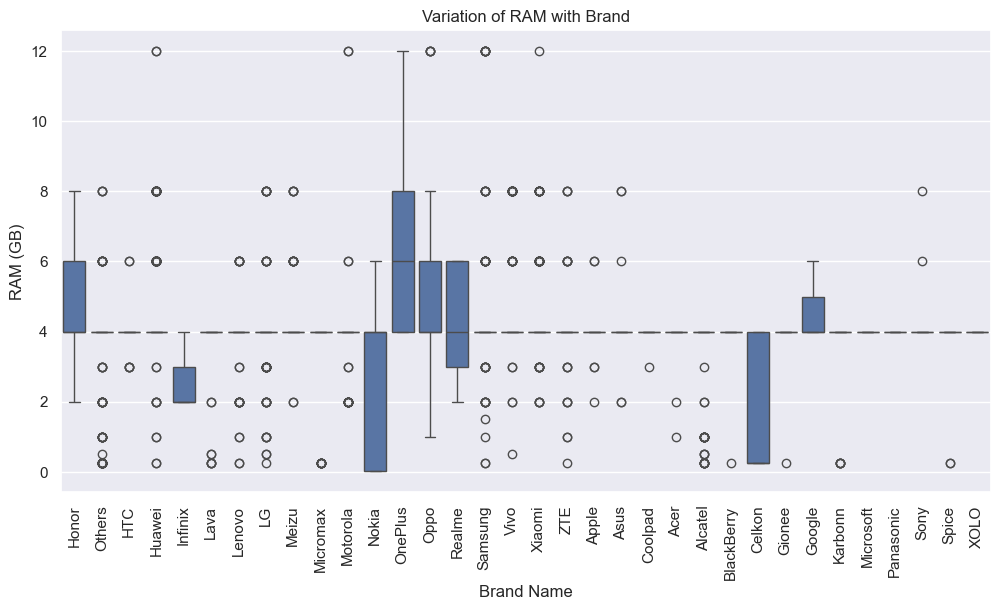

In [ ]:
# Variation of RAM with the brand

plt.figure(figsize=(12, 6))
sns.boxplot(x="brand_name", y="ram", data=df)
plt.title("Variation of RAM with Brand")
plt.xlabel("Brand Name")
plt.ylabel("RAM (GB)")
plt.xticks(rotation=90)
plt.show()

-OnePlus brand has the highest RAM, and Nokia has the lowest RAM.
-There are more extreme values of RAM associated with many brands.

**Brand name vs weight**

**Question: A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [ ]:
# dataset for devices with large battery>4500 mAh
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

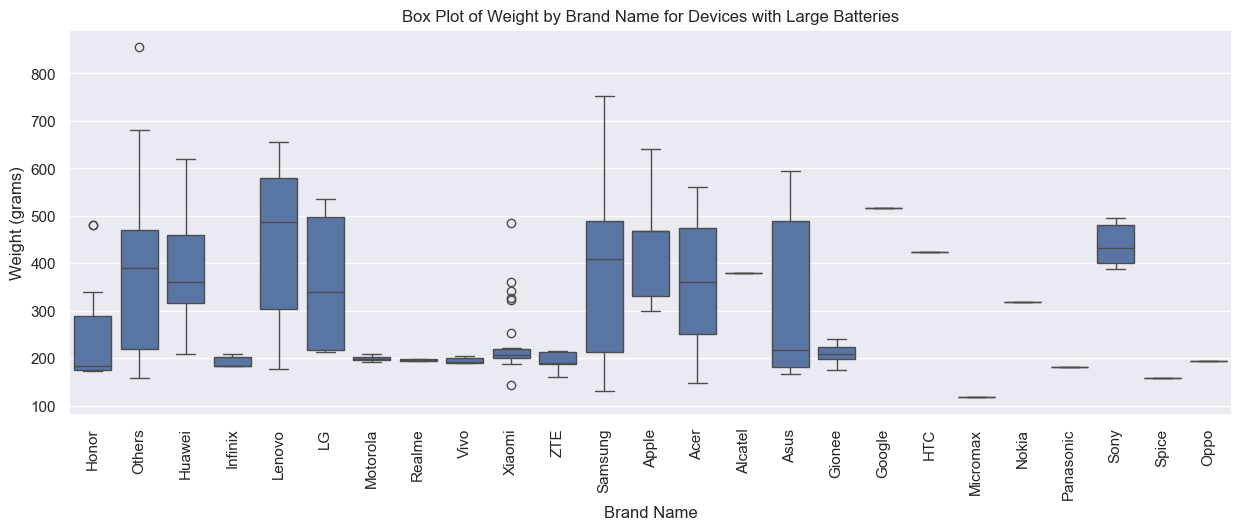

In [ ]:
# Filter devices with large batteries (> 4500 mAh)
df_large_battery = df[df["battery"] > 4500]

# Create a box plot for 'brand_name' and 'weight' in the df_large_battery dataframe
plt.figure(figsize=(15, 5))
sns.boxplot(x="brand_name", y="weight", data=df_large_battery)
plt.xticks(rotation=90)
plt.title("Box Plot of Weight by Brand Name for Devices with Large Batteries")
plt.xlabel("Brand Name")
plt.ylabel("Weight (grams)")
plt.show()

-Samsung has the highest battery weight or capacity while Micromax has the least battery weight.
-Outliers are noticeable with Honor, Others, and Xiaomi brands.

**Brand name vs Screen size**

**Question: Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

In [ ]:
# Convert screen size from inches to cm (1 inch =2.54 cm)
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

C:\Users\Moses Okesola\AppData\Local\Temp\ipykernel_112\2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


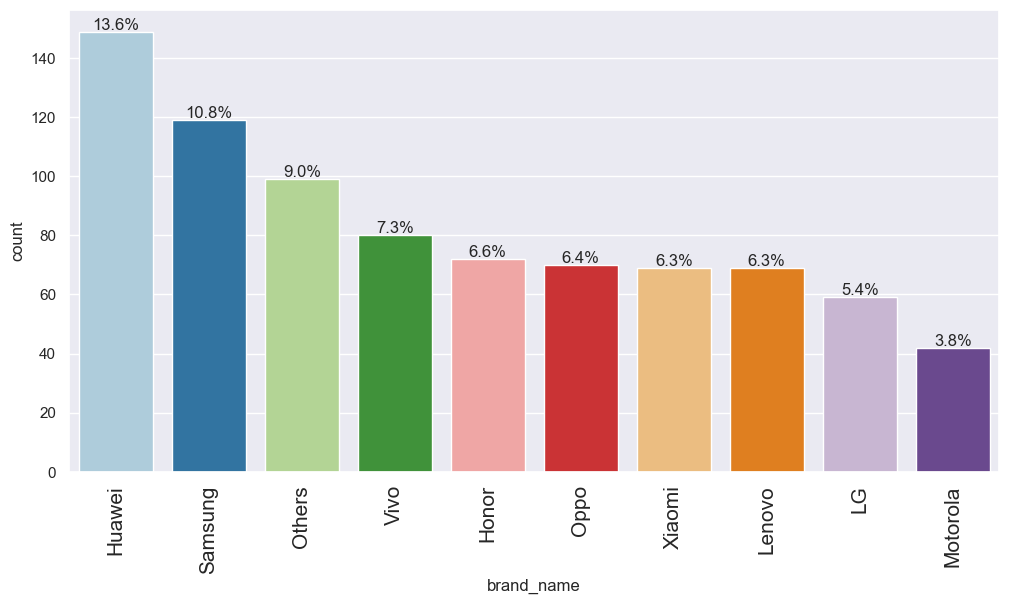

In [ ]:
# Call the labeled_barplot function to analyze the data
df_large_screen = df[
    df.screen_size > 6 * 2.54
]  ## Convert screen size from inches to cm (1 inch =2.54 cm)

labeled_barplot(data=df_large_screen, feature="brand_name", perc=True, n=10)

-Huawei brand of used devices has highest screen size> 6 inches.

-Motorola brand of used devices has the lowest screen size >6 inches.

**brand name vs selfie camera mp**

**Question:A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

Distribution of devices offering greater than 8MP selfie cameras across brands

In [ ]:
# Filter the original DataFrame for devices with selfie camera resolution greater than 8 megapixels
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

C:\Users\Moses Okesola\AppData\Local\Temp\ipykernel_112\2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


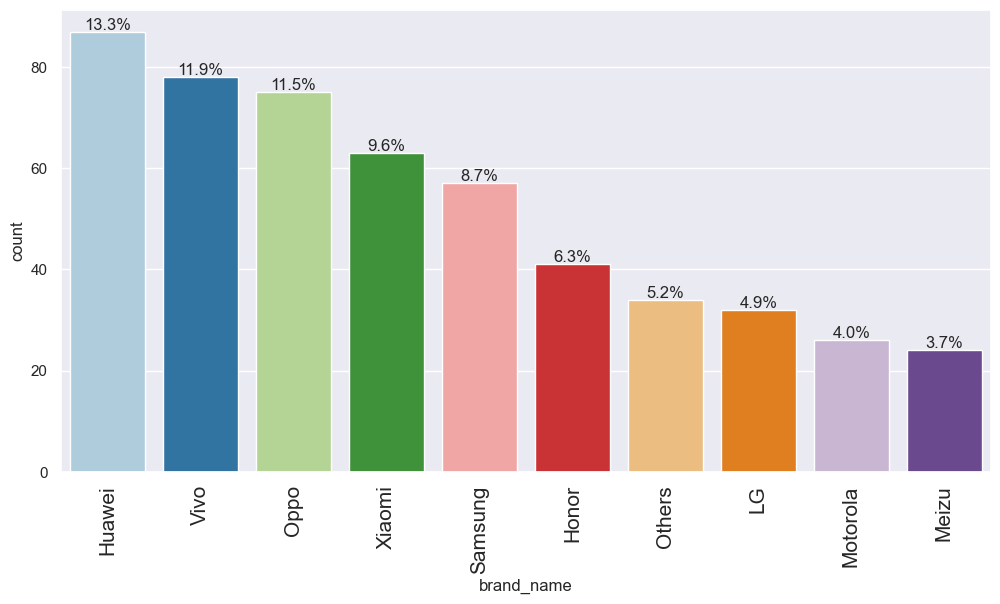

In [ ]:
# Call the labeled_barplot function to analyze the data
labeled_barplot(data=df_selfie_camera, feature="brand_name", perc=True, n=10)

-There are more Huawei used devices with selfie camera mp> 8MP while Meizu used devices have the least number with selfie camera mp> 8MP.

**main_camera_mp vs brand_name**


**Question: Main or Rear camera has a better resolution than Selfie or front Camera. What is the distribution of devices offering greater than 16MP main cameras across brands?**

In [ ]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

C:\Users\Moses Okesola\AppData\Local\Temp\ipykernel_112\2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


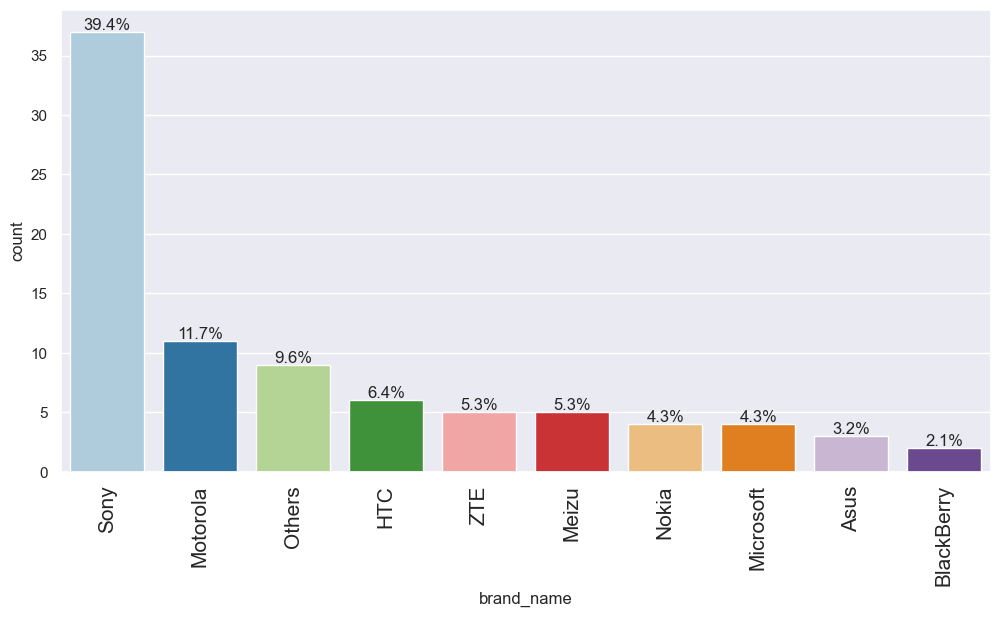

In [ ]:
# Call the labeled_barplot function to analyze the data
labeled_barplot(data=df_main_camera, feature="brand_name", perc=True, n=10)

-Sony brand of used devices has highest number of devices with main camera mp> 16MP.

-BlackBerry brand of used devices have the lowest number of devices with main camera mp> 16MP.

**Normalized used price vs Release year**

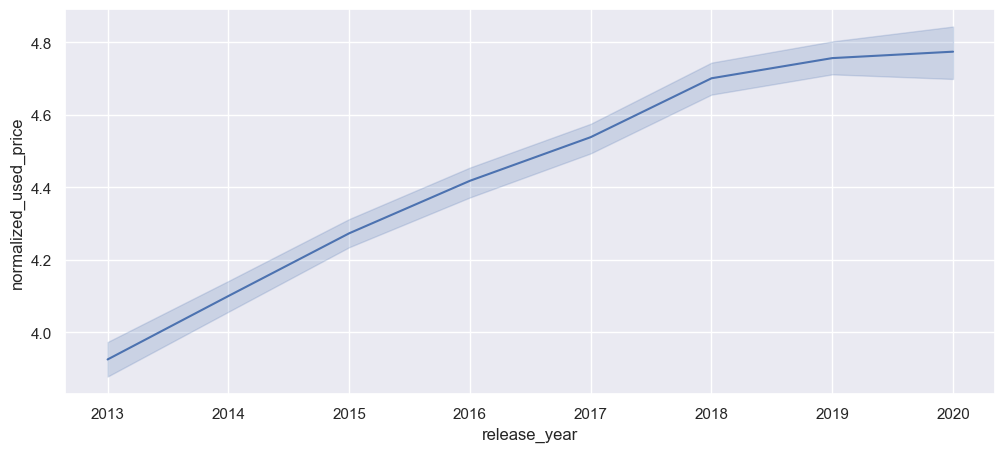

In [ ]:
# create lineplot of normalized_used_price and release_year
plt.figure(figsize=(12, 5))
sns.lineplot(x="release_year", y="normalized_used_price", data=df)
plt.show()

-The normalized used prices of used devices increase as the released year of the devices increases.

**Data Preprocessing**

**Treating Missing Values**

In [ ]:
# create a copy of the dataset to keep the original dataset unchanged
df1 = df.copy()

In [ ]:
# checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# List columns with missing values in the DataFrame df1
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

# Displaying the column names with missing values
for col in columns_with_missing_values:
    print(col)



main_camera_mp
selfie_camera_mp
int_memory
ram
battery
weight


We will impute the missing values in the data by the column medians grouped by release_year and brand_name.

In [ ]:
# Impute missing values in cols_impute with median by grouping the data on 'release_year' and 'brand_name'
for col in columns_with_missing_values:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["release_year", "brand_name"])[col].transform("median")
    )

# Check for missing values after imputing the above columns
missing_values_count = df1.isnull().sum()
print(missing_values_count)

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64


We will impute the remaining missing values in the data by the column medians grouped by brand_name.

In [ ]:
# Impute missing values in cols_impute with median by grouping the data on 'brand_name'
for col in columns_with_missing_values:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    )

# Check for missing values after imputing the above columns
missing_values_count = df1.isnull().sum()
print(missing_values_count)


brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64


We will fill the remaining missing values in the main_camera_mp column by the column median.

In [ ]:
# Impute missing values in 'main_camera_mp' column with median
median_main_camera_mp = df1["main_camera_mp"].median()
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(median_main_camera_mp)

# Check for missing values after imputing the "main_camera_mp" column
missing_values_count = df1.isnull().sum()
print(missing_values_count)

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64


All the missing values have been filled.

 **Feature Engineering**

**Handling Categorical Variables**: Convert categorical variables like 'brand_name' and 'os' into numerical format using one-hot encoding or label encoding.

In [ ]:
# One-hot encoding for 'os' column
df1_encoded = pd.get_dummies(df1, columns=['os'], prefix='os')

# One-hot encoding for 'os' and 'brand_name' columns
df1_encoded = pd.get_dummies(df1, columns=['os', 'brand_name'], prefix=['os', 'brand_name'])



from sklearn.preprocessing import LabelEncoder

# Check if the columns '4g' and '5g' exist in the DataFrame
if "4g" in df1.columns and "5g" in df1.columns:
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Encode '4g' and '5g' columns with 'yes' as 1 and 'no' as 0
    df1["4g_encoded"] = label_encoder.fit_transform(df1["4g"])
    df1["5g_encoded"] = label_encoder.fit_transform(df1["5g"])
else:
    print("Columns '4g' and/or '5g' not found in the DataFrame.")


**Temporal Features:**

Extract temporal features like 'age_of_device' from 'release_year' to capture the age of the device.

In [ ]:
# Calculate age of the device based on release year
current_year = 2021
df1["age_of_device"] = current_year - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["age_of_device"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: age_of_device, dtype: float64

 **Outliers detention and treatment**

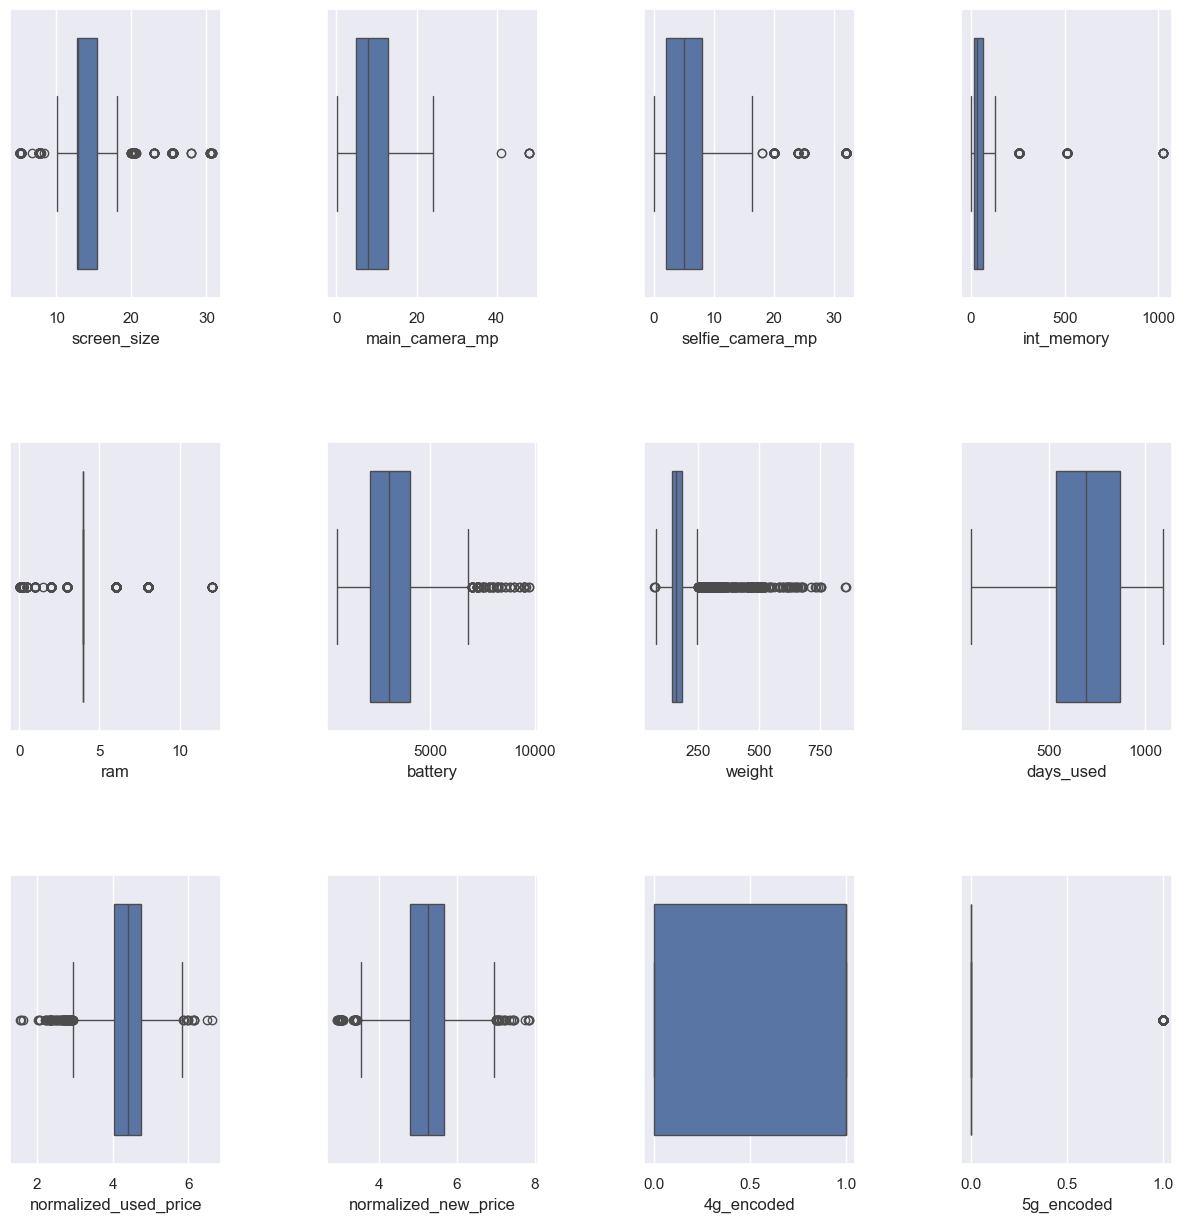

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    if i < 12:  # Limit the subplots to 12
        plt.subplot(3, 4, i + 1)
        sns.boxplot(data=df1, x=variable)

plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust the space between subplots

plt.show()


-There are extreme values notable with screen_size, main_camera_mp, selfie_camera_mp, int_memory, normalized_new_price, battery, weight,normalized_used_price, and sreen_size_inches.

-There are high extreme values with weight and battery.

-The extremw value with all dummie variables are to be ignored.

**Outliers treatment**

In [ ]:
# Calculate the median for updated numerical variables
median = df1[numerical_vars].median()

# Create a copy of the original DataFrame
df1_outliers_corrected = df1.copy()

# Determine outliers using a condition based on median value and standard deviation (adjust as needed)
lower_bound = median - 3 * df1[numerical_vars].std()
upper_bound = median + 3 * df1[numerical_vars].std()
outliers = (df1[numerical_vars] < lower_bound) | (df1[numerical_vars] > upper_bound)

**Data Preparation for modeling**

In [ ]:
# separating independent variables from dependent variables
X = df1.drop(columns=["normalized_used_price"]) # independent variables
# target_variable for prediction
y = df1['normalized_used_price']

print(X.head())
print()
print(y.head())


  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  4g_encoded  5g_encoded  age_of_device  
0              4.715100           1           0              1  
1              5.519018           1           1              1  
2          

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## create dummies for independent features

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Perform the train-test split with a 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
# Code is assuming 'X' contains the independent variables and 'y' is the dependent variable
# 'test_size=0.3' specifies a 70:30 split for the training and testing data
# 'random_state=42' ensures reproducibility of the split

# Print the shapes of the resulting datasets
print("Shape of x_train:", x_train.shape[0])
print("Shape of x_test:", x_test.shape[0])
print("Shape of y_train:", y_train.shape[0])
print("Shape of y_test:", y_test.shape[0])

Shape of x_train: 2417
Shape of x_test: 1037
Shape of y_train: 2417
Shape of y_test: 1037


**Exploratory Data Analysis**

**It is good to perform exploratory data analysis after manipulation of data to gain insights,
identify patterns, and understand the underlying structure of the data.**

**Statistical summary of the dataset**

In [ ]:
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.617597,4.749438,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,6.555067,6.96844,0.0,2.0,5.0,8.0,32.0
int_memory,3454.0,NaN,NaN,NaN,54.528474,84.934991,0.01,16.0,32.0,64.0,1024.0
ram,3454.0,NaN,NaN,NaN,4.03262,1.368598,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3132.577446,1298.884193,500.0,2100.0,3000.0,4000.0,9720.0


-The average values of screen_size, days_used, normalized_used_price, and normalized_used_price are the same after data manipulation.

-The std and the range of screen_size, days_used, normalized_used_price, and normalized_used_price are the same after data manipulation.

-There were slightly changes in the average values and std of main_camera_mp, selfie_camera_mp,ram,battery,weight,and int_memory after data manipulation, but their median remains the same.

-The release_year has been replaced with age_of_device

-4g_encoded and 5g_encoded are dummie variables that can't influence the model prediction.

**Check for missing values**

In [ ]:
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
days_used                0
normalized_used_price    0
normalized_new_price     0
4g_encoded               0
5g_encoded               0
age_of_device            0
dtype: int64

There is no missing values

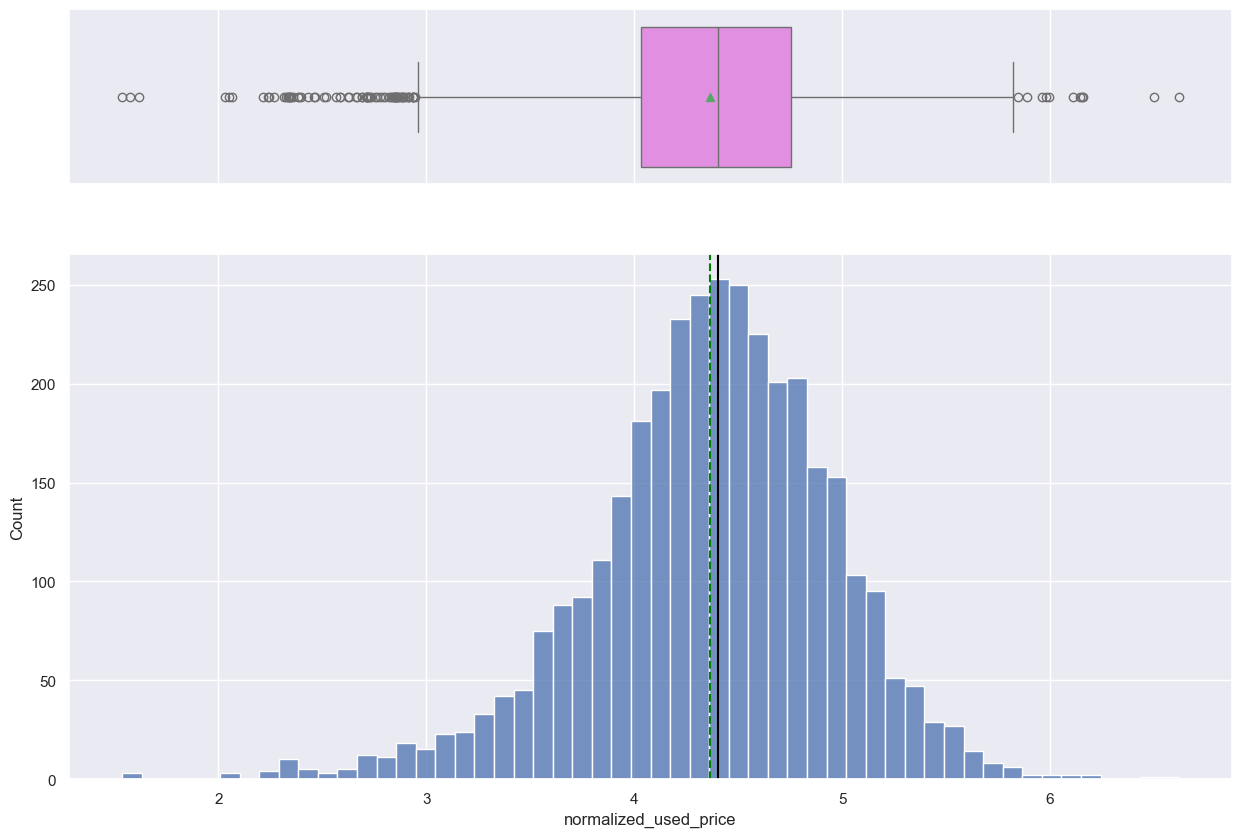

In [ ]:
histogram_boxplot(df, "normalized_used_price")

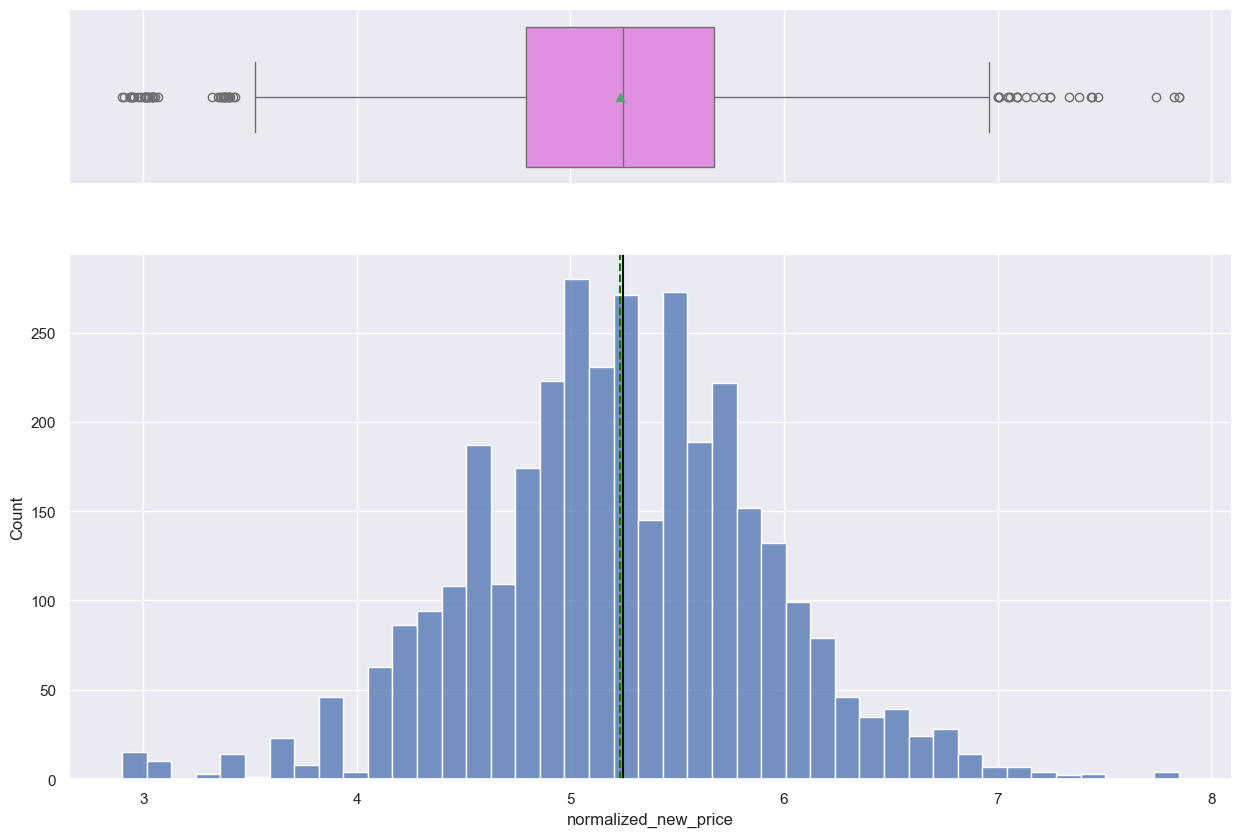

In [ ]:
histogram_boxplot(df, "normalized_new_price")

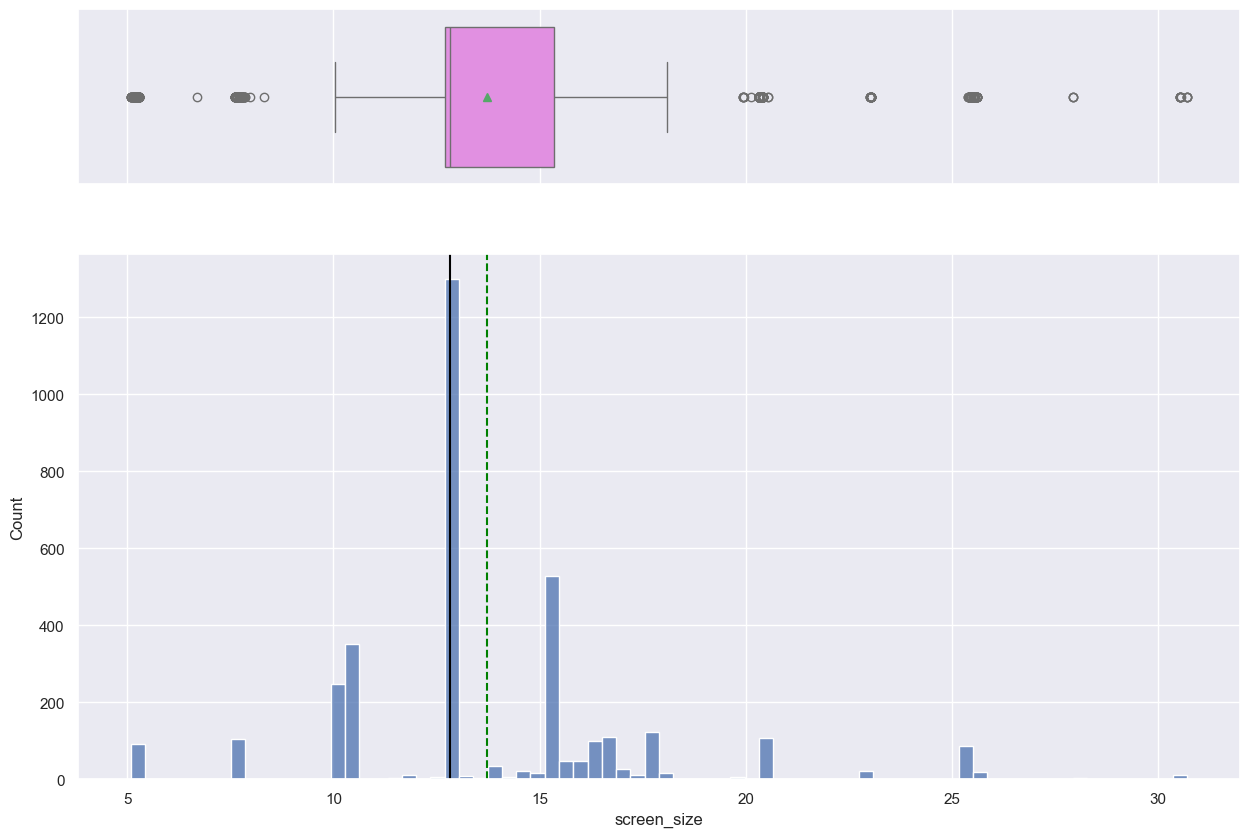

In [ ]:
histogram_boxplot(df, "screen_size")

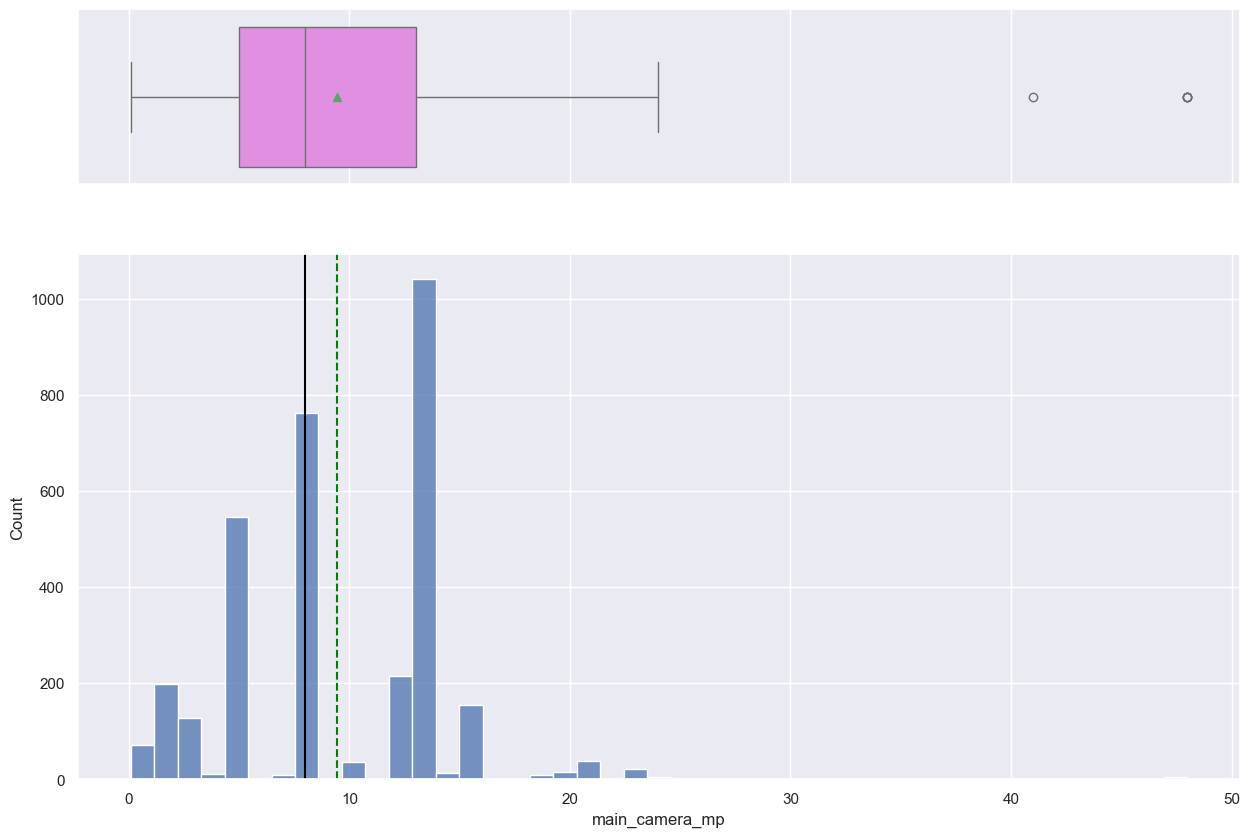

In [ ]:
histogram_boxplot(df, "main_camera_mp")

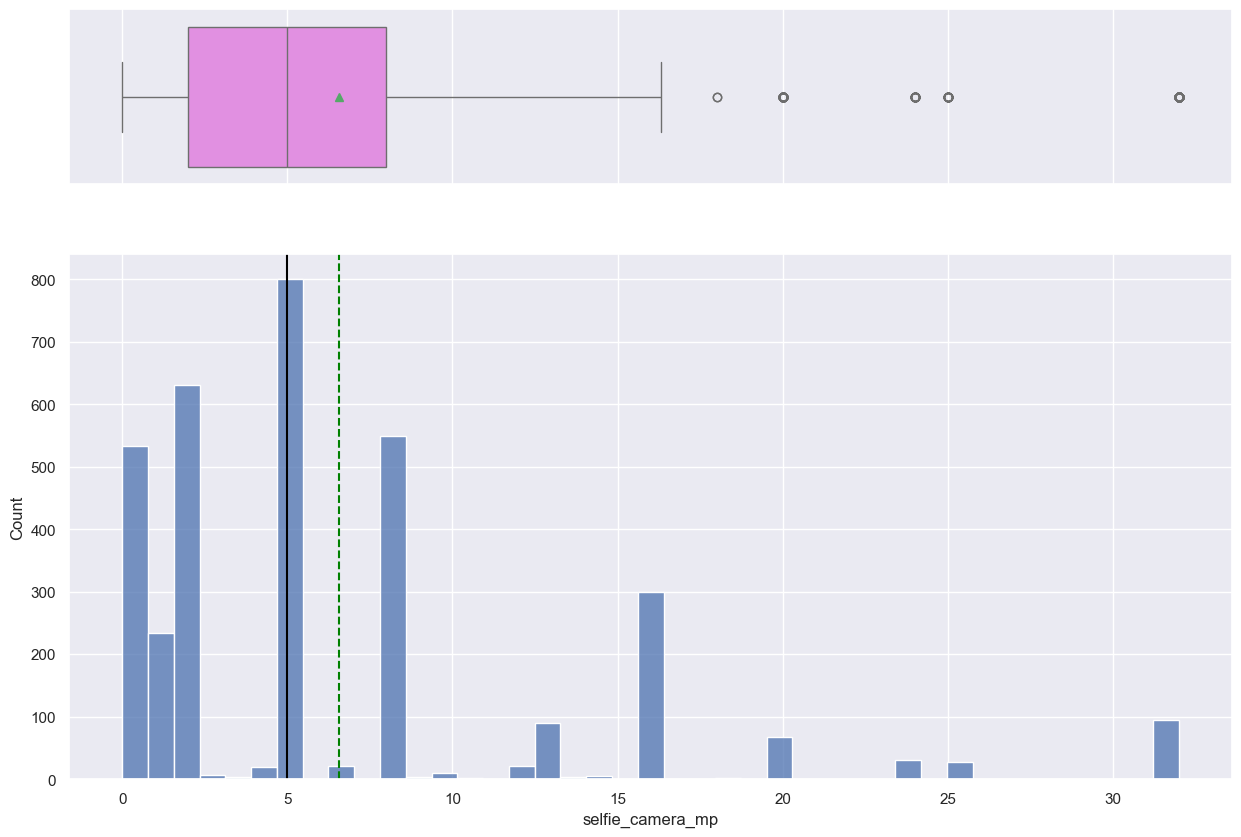

In [ ]:
histogram_boxplot(df, "selfie_camera_mp")

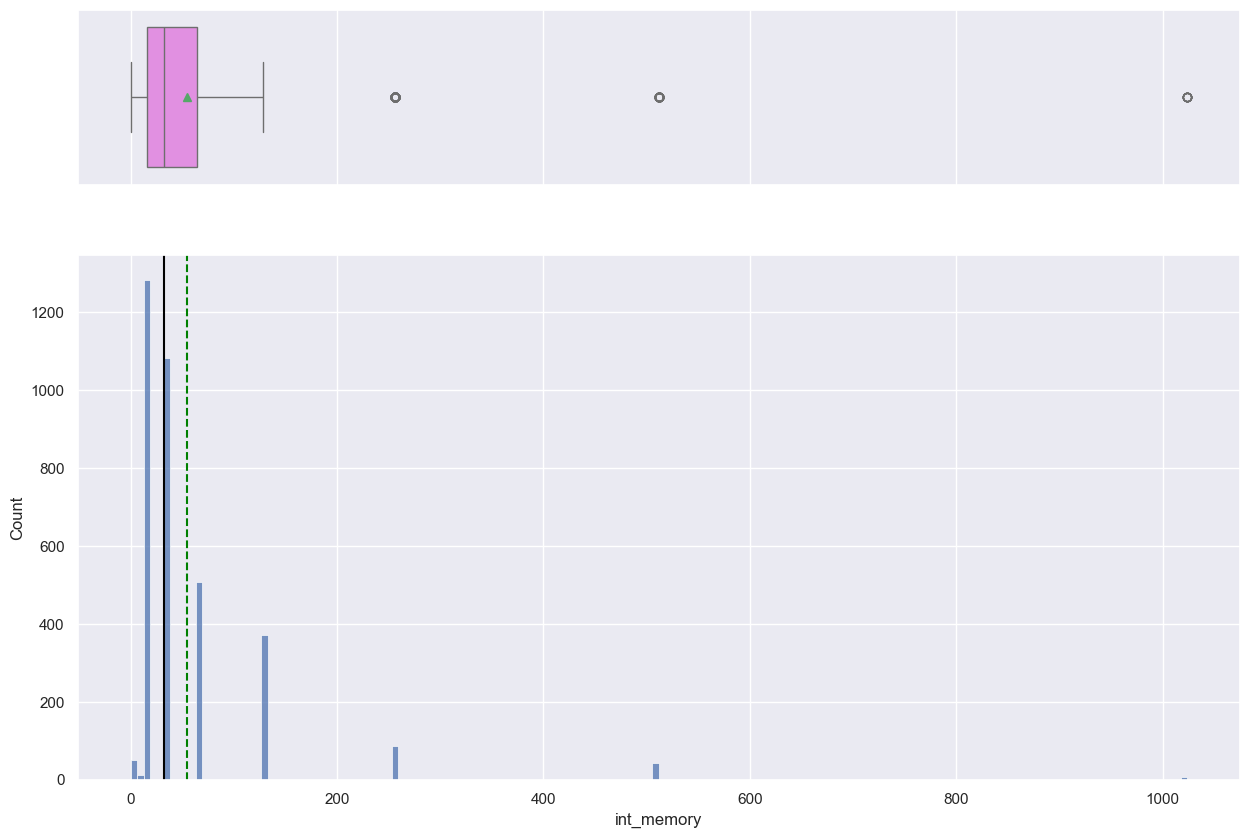

In [ ]:
histogram_boxplot(df, "int_memory")

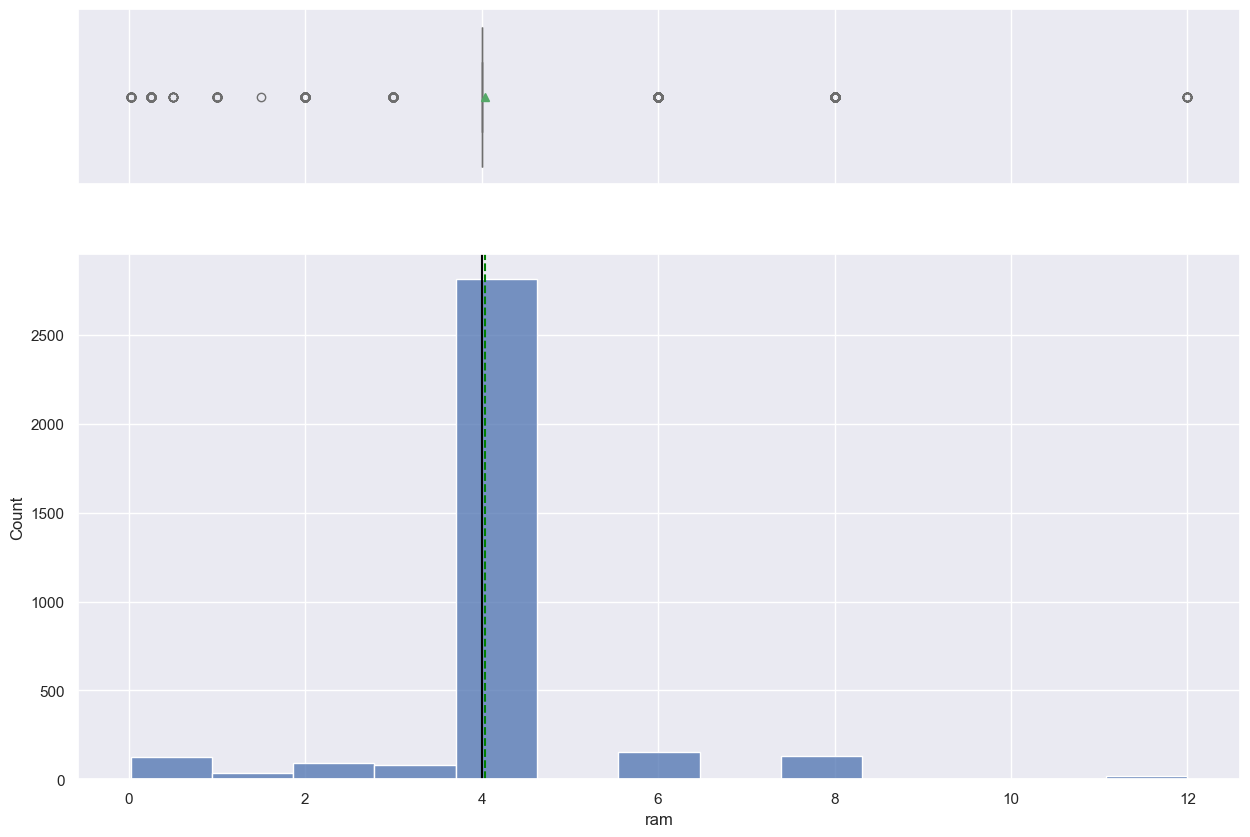

In [ ]:
histogram_boxplot(df, "ram")

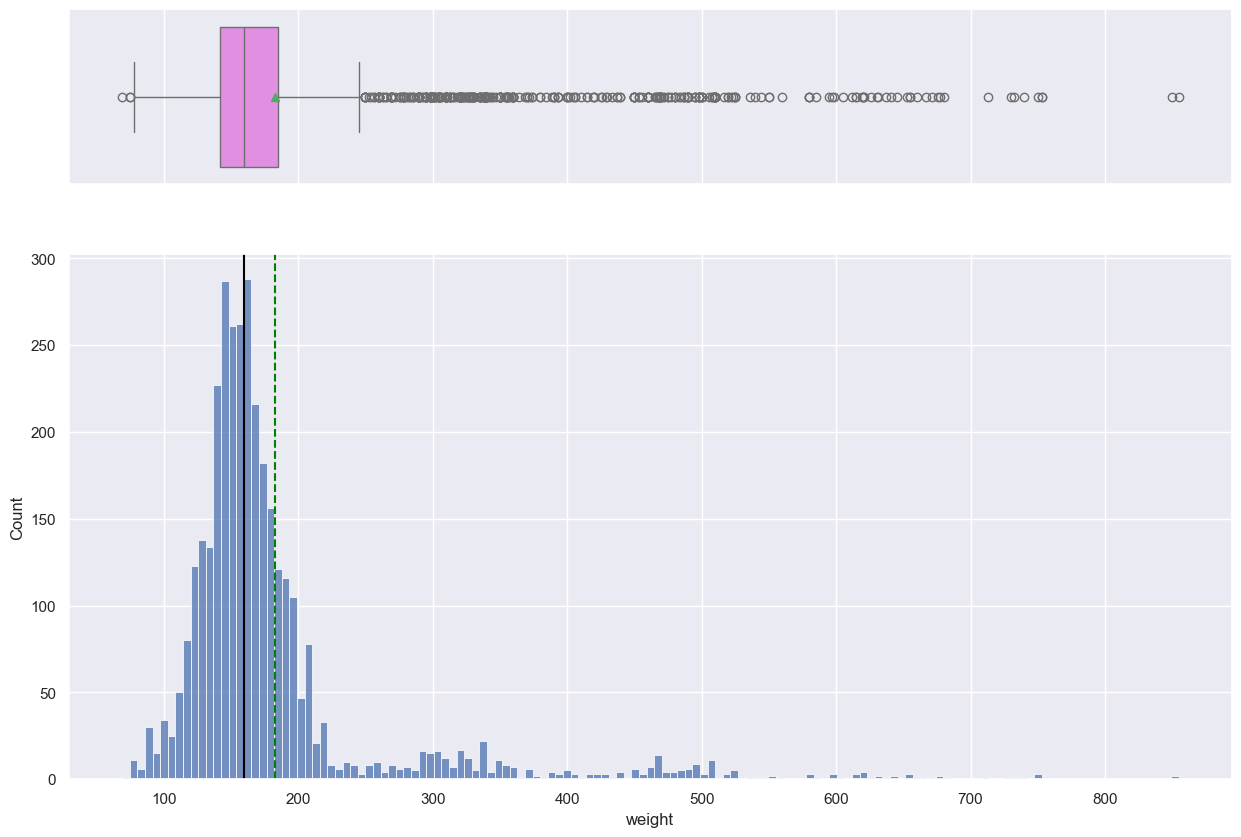

In [ ]:
histogram_boxplot(df, "weight")

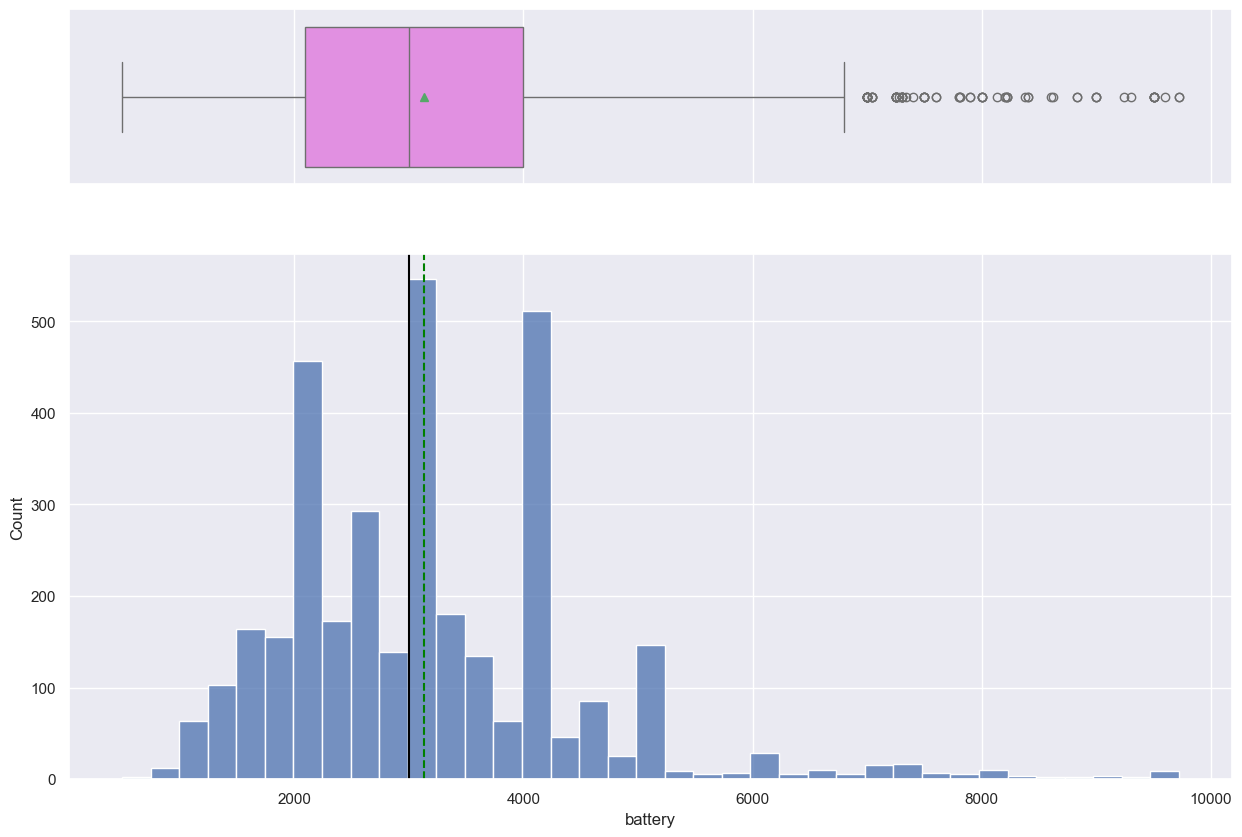

In [ ]:
histogram_boxplot(df, "battery")

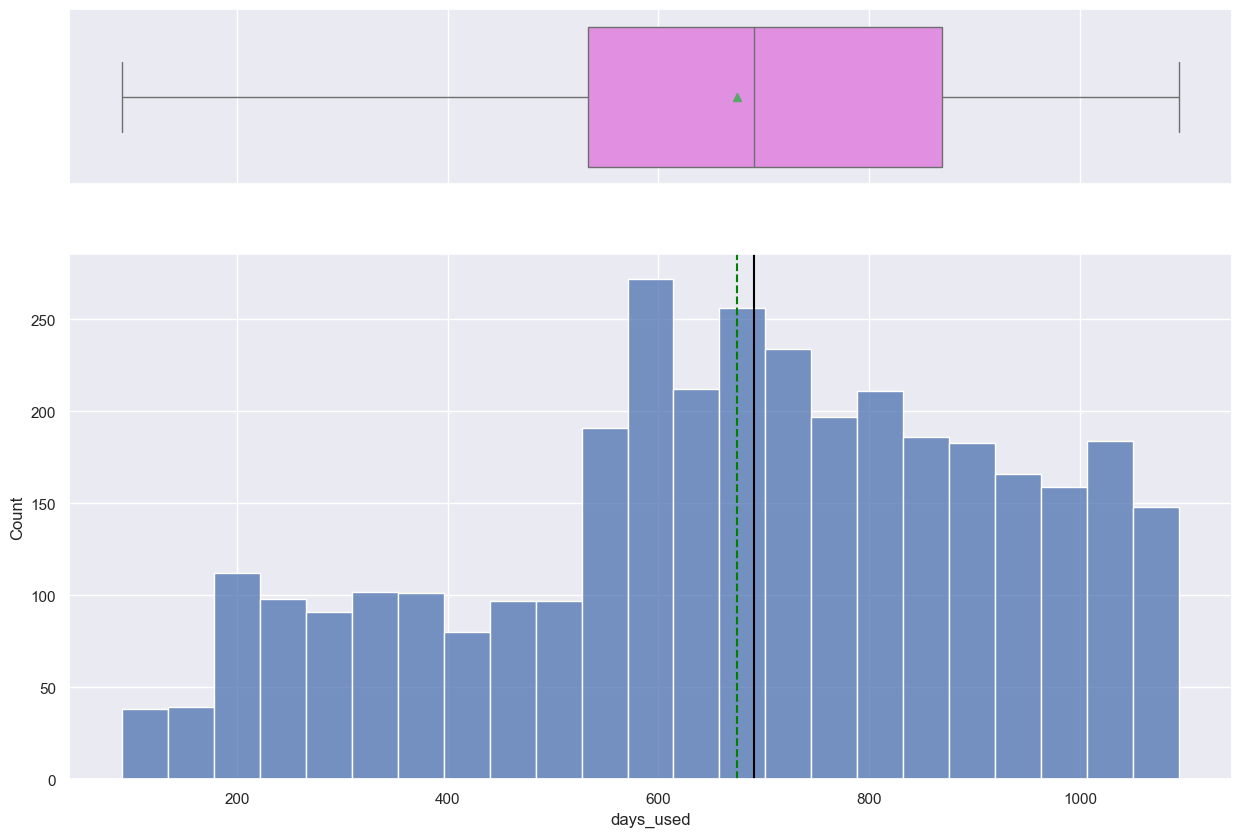

In [ ]:
histogram_boxplot(df, "days_used")

C:\Users\Moses Okesola\AppData\Local\Temp\ipykernel_112\2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


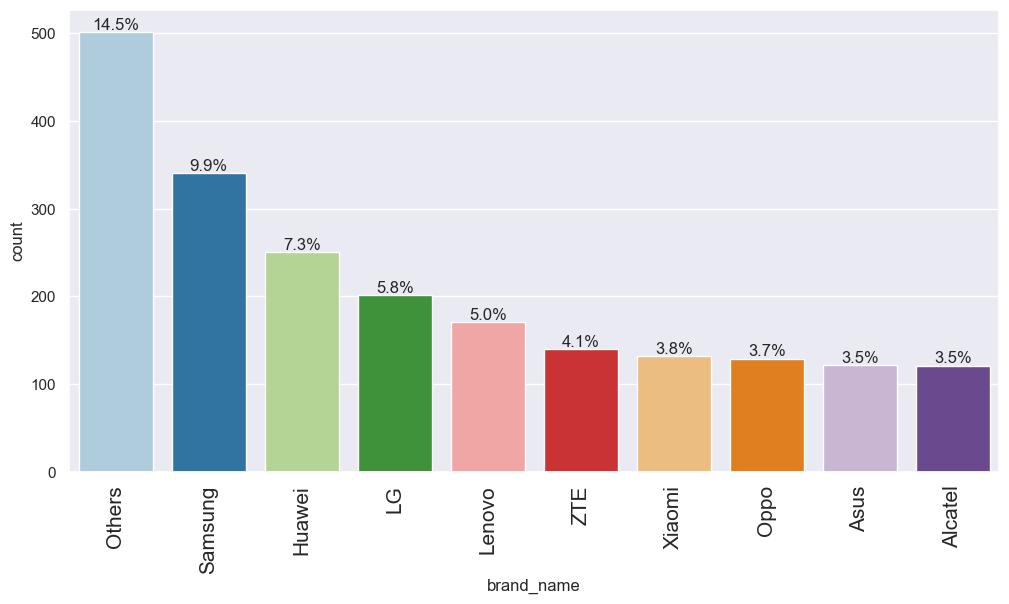

In [ ]:
labeled_barplot(df, "brand_name", perc=True, n=10)

C:\Users\Moses Okesola\AppData\Local\Temp\ipykernel_112\2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


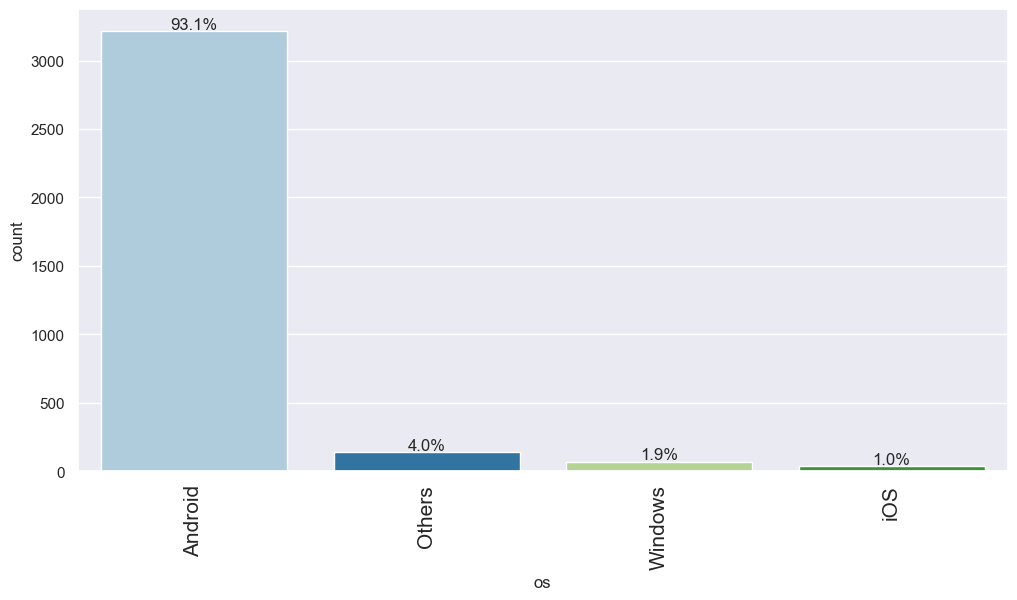

In [ ]:
labeled_barplot(df, "os", perc=True, n=10)

C:\Users\Moses Okesola\AppData\Local\Temp\ipykernel_112\2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


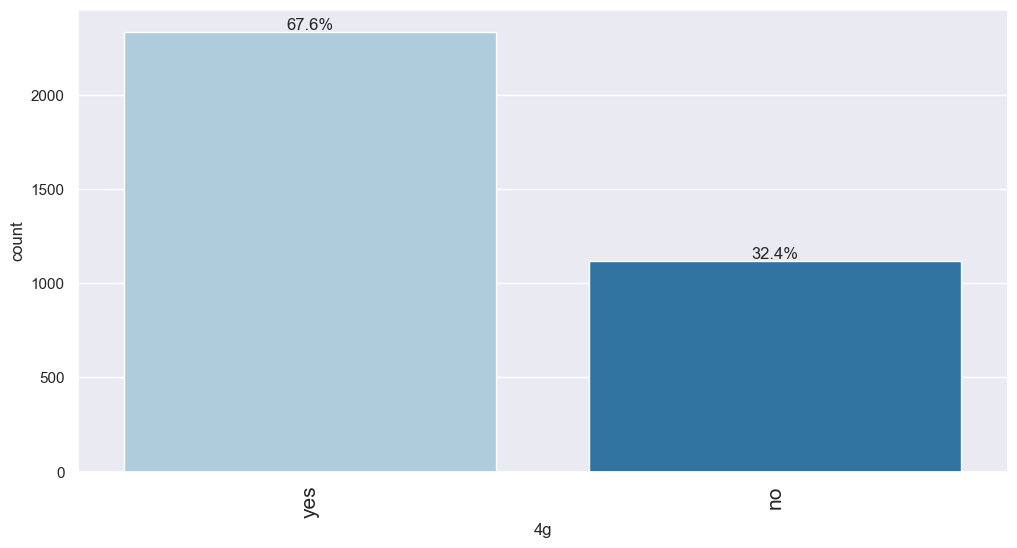

In [ ]:
labeled_barplot(df, "4g", perc=True, n=10)

C:\Users\Moses Okesola\AppData\Local\Temp\ipykernel_112\2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


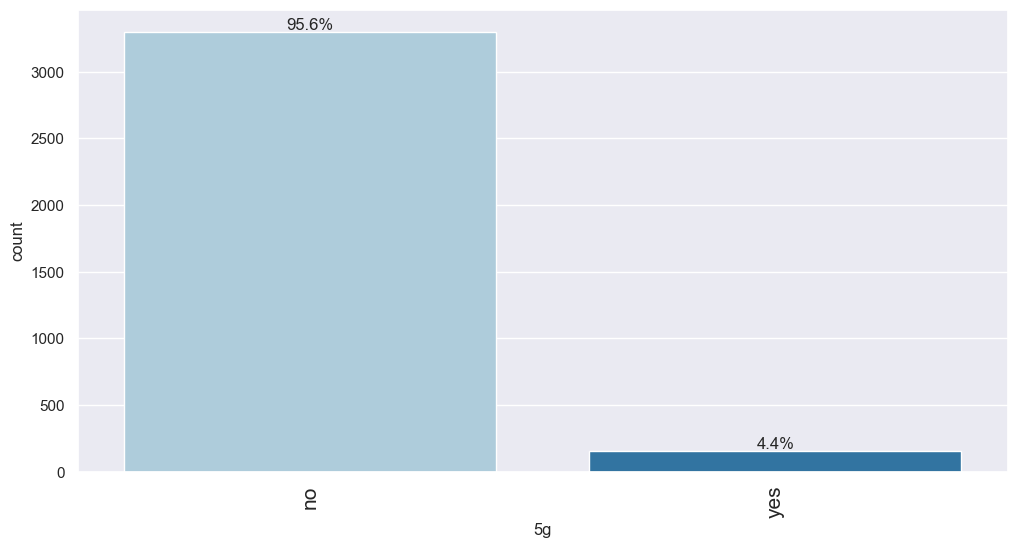

In [ ]:
labeled_barplot(df, "5g", perc=True, n=10)

C:\Users\Moses Okesola\AppData\Local\Temp\ipykernel_112\2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


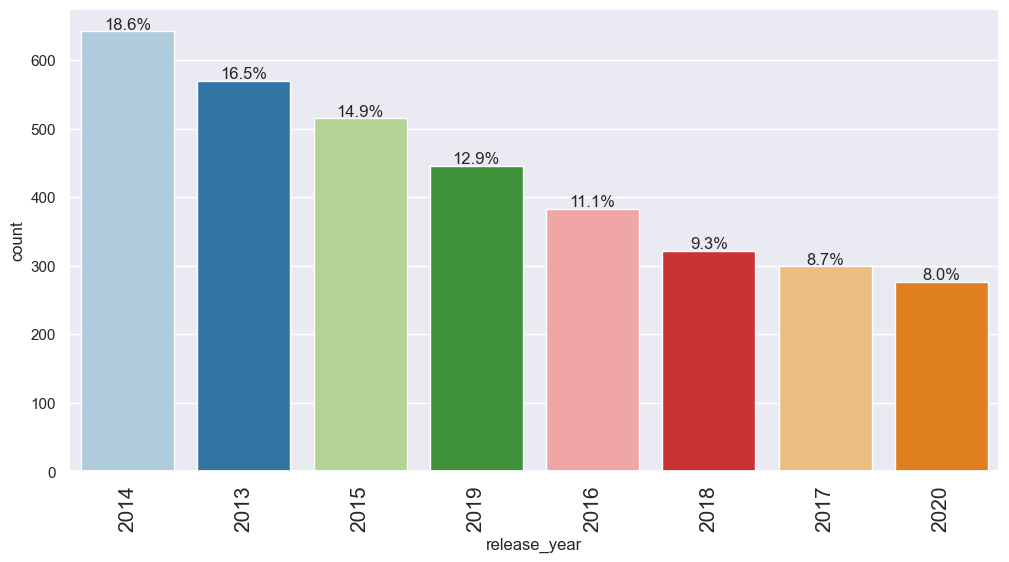

In [ ]:
labeled_barplot(df, "release_year", perc=True, n=10)

The data analysis of both the numerical and categorical variables after data manipulations are the same before the data manipulations.

**Bivariate Analysis**

**Correlation check**

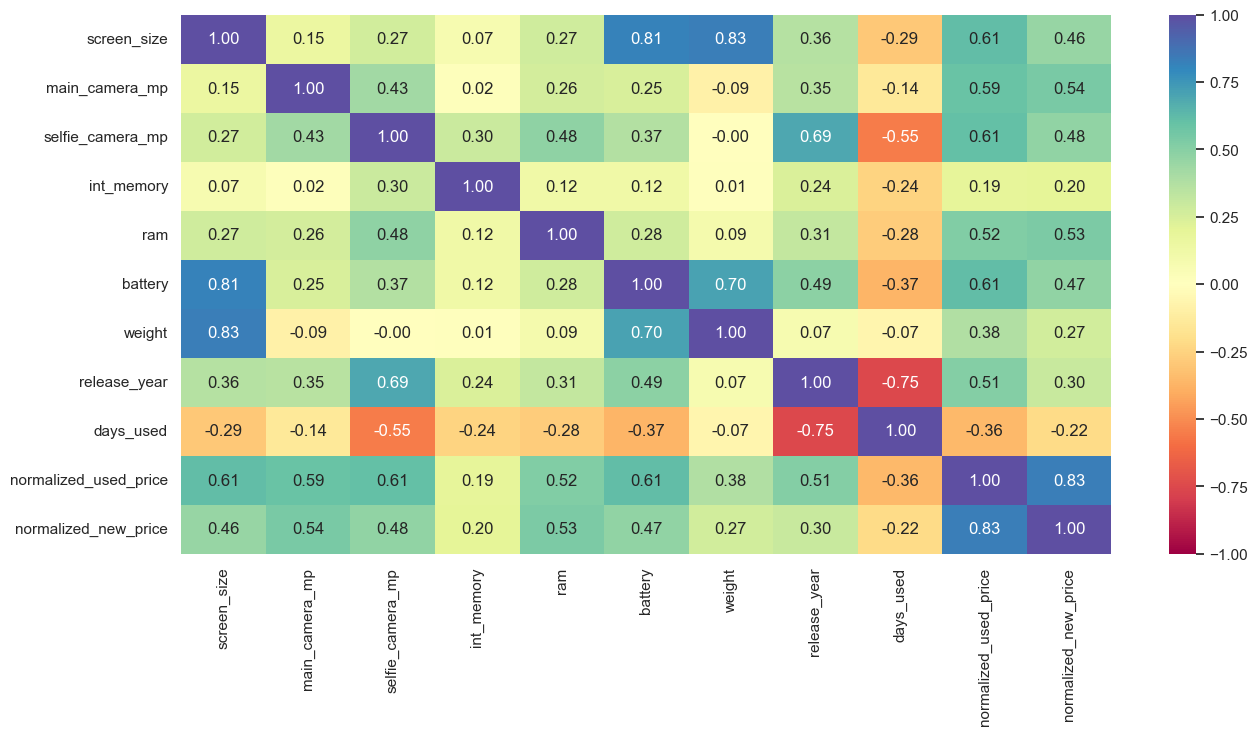

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

-The correlation of normalised_used_ price with numerical variables after data manipulation is the same before data manipulation

-normalized_used_price has moderate positive corellation with screen_size, main_camera_mp, selfie_camera_mp, ram,battery,and strong positive correlation with normalized_new_price.

-The correlation between normalized_used_price and int_memory, and weight is weakly positive.

-normalized_used_price has weak negative correlation with days_used.


**Model Building - Linear Regression**

In [ ]:
# Convert pandas DataFrames to numpy arrays for endogenous and exogenous variables
y_train_arr = y_train.values.astype(float)  # Convert to float type
x_train_arr = x_train.values.astype(float)  # Convert to float type

# Fit the OLS model using numpy arrays
olsmodel1 = sm.OLS(y_train_arr, x_train_arr)
ols_result = olsmodel1.fit()

# Print the summary of the OLS model
print(ols_result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     277.1
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:37:44   Log-Likelihood:                 125.15
No. Observations:                2417   AIC:                            -152.3
Df Residuals:                    2368   BIC:                             131.4
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4172      0.072     19.677      0.0

R-squared value of 0.849 means that ~85% of the variance in the dependent variable is
explained by the independent variables included in the model.

An Adjusted R-squared value of 0.846 indicates that the model fits the data well and is robust even after
accounting for the number of predictors.

R-squared value and an Adjusted R-squared value close to 1 indicates a strong relationship between the
independent and dependent variables.

A higher R-squared value of 0.849 signifies better model fit.

A high F-statistic of 277.1 indicates that the regression model is statistically significant, meaning that
at least one of the independent variables has a significant effect on the dependent variable.


**Model Performance Check**


We shall check the performance of the model by calculating:

RMSE:Root Mean Squared Error

MAE:Mean Absolute Error

𝑅-squared:Coefficient of Determination

Adj R-Modification of 𝑅-squared

MAPE:Mean Absolute Percentage Error

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
olsmodel1 = LinearRegression()
olsmodel1.fit(x_train, y_train)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229761,0.178533,0.848887,0.845628,4.293664


In [ ]:
# checking model performance on test set (seen 30% data)
olsmodel1 = LinearRegression()
olsmodel1.fit(x_train, y_train)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239062,0.188692,0.832176,0.823486,4.513288


-The train R-squared value is ~0.85 which indicates that the model is not underfitting.

-A test R-squared value close to the training R-squared (without a significant drop) indicates that the model generalizes well to unseen data and is not underfitting.

-The train and test RMSE and MAE are approximately comparable. Therefore, the model is not overfitting.

-MAE suggests that the model can predict normalized_used_price with a mean error of ~0.19 on test data.

-MAPE of ~4.51 on test data means that we are able to predict within 45% of normalized used prices of the refurbished devices.


**Checking Linear Regression Assumptions:**

-No Multicollinearity

-Linearity of variables

-Independence of error terms

-Normality of error terms

-No Heteroscedasticity

**Test for Multicollinearity**

**Define a function to check VIF**

In [ ]:
# Test for multicolinearity using Variance Inflation Factor(VIF)
# Let's define a function to check VIF.

def checking_vif(predictors):
    # Check and clean the predictors DataFrame
    predictors = predictors.select_dtypes(include=[np.number])  # Select numeric columns only


    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # Calculate VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]

    return vif


In [ ]:
# Call the checking_vif function on the train data to check VIF
train_vif = checking_vif(x_train)
print(train_vif)

C:\Users\Moses Okesola\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                  feature         VIF
0                   const  232.676933
1             screen_size    8.262147
2          main_camera_mp    2.418167
3        selfie_camera_mp    2.872720
4              int_memory    1.363390
5                     ram    2.283507
6                 battery    4.066126
7                  weight    6.417982
8               days_used    2.580338
9    normalized_new_price    3.218722
10             4g_encoded         inf
11             5g_encoded         inf
12          age_of_device    4.878548
13     brand_name_Alcatel    3.458576
14       brand_name_Apple   11.195090
15        brand_name_Asus    3.652764
16  brand_name_BlackBerry    1.623330
17      brand_name_Celkon    1.873667
18     brand_name_Coolpad    1.575445
19      brand_name_Gionee    2.076683
20      brand_name_Google    1.388001
21         brand_name_HTC    3.460299
22       brand_name_Honor    3.559332
23      brand_name_Huawei    6.395779
24     brand_name_Infinix    1.191800
25     brand

-There exist multicolinearity between some independent variables as indicated by high

**Removing Multicolinearity**

-Drop every column one by one that has a VIF score greater than 5.A VIF above 5 signals high multicollinearity that may distort the interpretation of the coefficients.

-Look at the adjusted R-squared and RMSE of all these models.

-Drop the variable that makes the least change in adjusted R-squared.

-Check the VIF scores again.

-Continue till you get all VIF scores under 5.

-Ignore the VIF values of constant, and dummie variables because they can't influence our model for prediction.

In [ ]:
# specify the column to drop
col_to_drop = "screen_size"  ## Column to be dropped

# specify the train data from which to drop the column specified
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping", col_to_drop)
vif

C:\Users\Moses Okesola\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF after dropping screen_size


,feature,VIF
0,const,209.123889
1,main_camera_mp,2.417922
2,selfie_camera_mp,2.865425
3,int_memory,1.357714
4,ram,2.283481
5,battery,3.774730
6,weight,2.864083
7,days_used,2.567972
8,normalized_new_price,3.170168
9,4g_encoded,inf


In [ ]:
# checking model performance on train set (seen 70% data)
olsmodel1 = LinearRegression()
olsmodel1.fit(x_train, y_train)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229761,0.178533,0.848887,0.845628,4.293664


In [ ]:
# checking model performance on test set (seen 30% data)
olsmodel1 = LinearRegression()
olsmodel1.fit(x_train, y_train)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239062,0.188692,0.832176,0.823486,4.513288


In [ ]:
# specify the column to drop
col_to_drop = "weight"  ## Column to be dropped

# specify the train data from which to drop the column specified
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping", col_to_drop)
vif

C:\Users\Moses Okesola\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF after dropping weight


,feature,VIF
0,const,217.374254
1,screen_size,3.687059
2,main_camera_mp,2.338735
3,selfie_camera_mp,2.840740
4,int_memory,1.363340
5,ram,2.279885
6,battery,3.768114
7,days_used,2.563460
8,normalized_new_price,3.217341
9,4g_encoded,inf


In [ ]:
# checking model performance on train set (seen 70% data)
olsmodel1 = LinearRegression()
olsmodel1.fit(x_train, y_train)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229761,0.178533,0.848887,0.845628,4.293664


In [ ]:
# checking model performance on test set (seen 30% data)
olsmodel1 = LinearRegression()
olsmodel1.fit(x_train, y_train)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239062,0.188692,0.832176,0.823486,4.513288


It is observed that the removal of both screen_size and weight variables one by one because of their VIF>5, indicates that the performance  metrics remain the same for train and test performances.

**Dropping high p-value variables**

**define loop function to drop high p-value variables**

In [ ]:
# Convert the 'y_train' Pandas Series to a NumPy array with appropriate data type
x_train_array = x_train.values.astype(float)
y_train_array = y_train.values.astype(float)

# Initial list of columns
cols = x_train.columns.tolist()

# Setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # Defining the train set
    x_train_aux = x_train_array[:, [x_train.columns.get_loc(col) for col in cols]]

    # Fitting the model
    model = sm.OLS(y_train_array, sm.add_constant(x_train_aux)).fit()

    # Getting the p-values and the maximum p-value
    p_values = model.pvalues

    # Find the index of the variable with the maximum p-value
    max_p_value_index = np.argmax(p_values)

    max_p_value = p_values[max_p_value_index]

    if max_p_value > 0.05:
        feature_with_p_max = cols[max_p_value_index]
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols

print(selected_features)




['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'normalized_new_price', '4g_encoded', '5g_encoded', 'age_of_device', 'brand_name_Celkon', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others', '4g_yes', '5g_yes']


In [ ]:
# Specify the train and test data with selected features
x_train3 = x_train[selected_features]
x_test3 = x_test[selected_features]

In [ ]:
# Convert Pandas Series 'y_train' to a NumPy array with a suitable data type
y_train_array = y_train.values.astype(float)

# Define x_train3 with selected features from x_train
x_train3 = x_train[selected_features]

# Convert x_train3 Pandas DataFrame to a NumPy array with a suitable data type
x_train3_array = x_train3.values.astype(float)

# Fit OLS model on the updated dataset
olsmodel2 = sm.OLS(y_train_array, sm.add_constant(x_train3_array)).fit()

# Print the summary of the OLS model
print(olsmodel2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     886.8
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:37:50   Log-Likelihood:                 110.96
No. Observations:                2417   AIC:                            -189.9
Df Residuals:                    2401   BIC:                            -97.27
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3715      0.052     26.565      0.0

R-squared value of 0.847 means that approximately 84.7% of the variance in the dependent variable is
explained by the independent variables included in the model.

An Adjusted R-squared value of 0.846 indicates that the model fits the data well and is robust even after
accounting for the number of predictors.

R-squared value and an Adjusted R-squared value close to 1 indicates a strong relationship between the
independent and dependent variables.

A higher R-squared value of 0.847 signifies better model fit.

A high F-statistic of 886.8 indicates that the regression model is statistically significant, meaning that
at least one of the independent variables has a significant effect on the dependent variable.


**Check the rest of the assumptions on oslmodel2.**

**Test of Linearity and Independence**

In [ ]:
# Create a DataFrame to store actual, fitted, and residual values
df_pred = pd.DataFrame()

# Add actual, fitted, and residual values to the DataFrame
df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

# Display the first few rows of the DataFrame
df_pred.head()

,Actual Values,Fitted Values,Residuals
1744,4.261975,4.311553,-0.049578
3141,4.175156,3.860832,0.314324
1233,4.117410,4.433246,-0.315836
3046,3.782597,3.848331,-0.065733
2649,3.981922,3.920911,0.061011


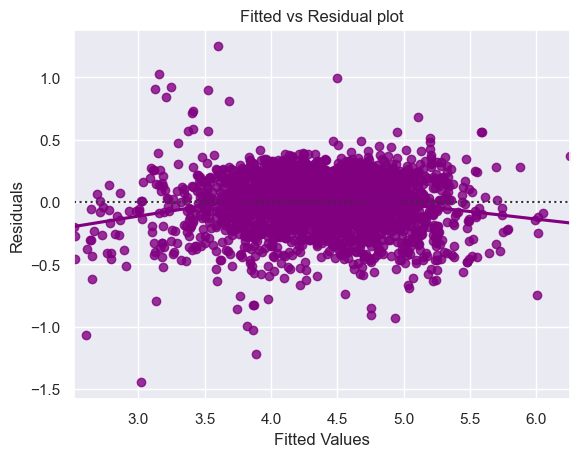

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

-The above scatterplot shows the distribution of residuals(errors) versus fitted values(predicted values).

-The plot above shows no pattern of relationship.Hence, the assumptions of linearity and independence are satisfied.


**Test of Normality**

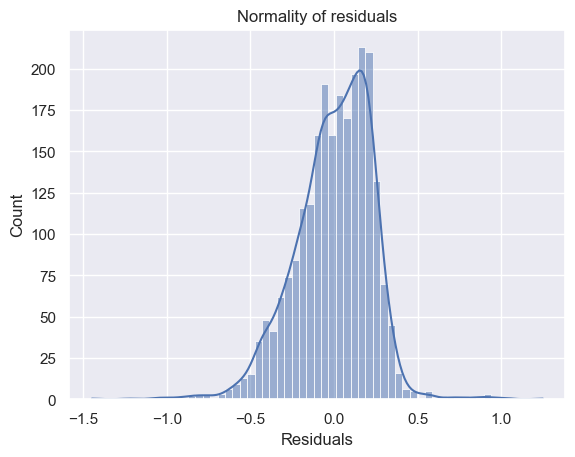

In [ ]:
# Plot the distribution of residuals as a histogram using Seaborn
sns.histplot(
    data=df_pred, x="Residuals", kde=True
)  # specify 'x' as 'Residuals' for the histogram

plt.title("Normality of residuals")
plt.show()

The distribution of residuals is very close to normal,but not symmetric around zero but slightly skewed or tilted at the top.

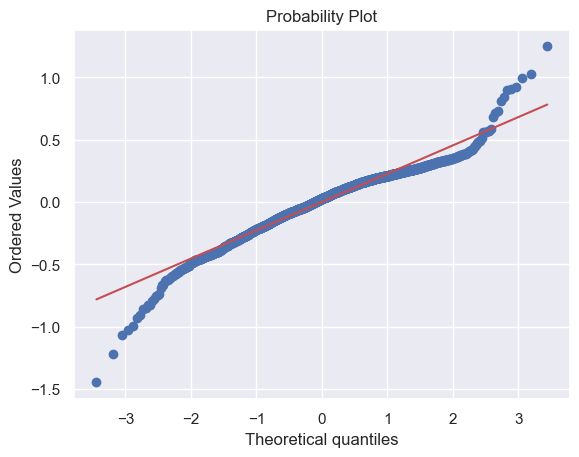

In [ ]:
import pylab
import scipy.stats as stats

# Create a Q-Q plot to check the normality of residuals
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)

plt.show()

-The residuals more or less follows a straight line except for the tails.

-We shall check the results with Shapiro-Wilk test.

In [ ]:
# Perform Shapiro-Wilk test of normality on the Residuals
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.963483452796936, pvalue=2.9948930717316565e-24)

-Because p-value<0.05, the Residuals are not normal under Shapiro-Wilk test.

-We can approximately accept that the distribution is close to normal.

-We conclude that the assumption is satisfied.

**Test of Homoscedasticity**

We will test for homoscedasticity by using the goldfeldquandt test.

If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic.

Otherwise, they are heteroscedastic.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]

# Define the selected features based on column names present in df_pred
selected_features = [
    "Actual Values",
    "Fitted Values",
]  # Update this with appropriate columns from df_pred

# Apply the Goldfeld-Quandt test for heteroscedasticity
test = sms.het_goldfeldquandt(df_pred["Residuals"], df_pred[selected_features])

lzip(name, test)

[('F statistic', 54.068100361054185), ('p-value', 0.0)]

The p-value = o.999999>0.05 indicates that Residuals are homoscedastic. Therefore, the assumption is satisfied.

**Predictions on test data**

In [ ]:
pred = olsmodel2.predict(x_test3)
df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1174,4.553772,4.494382
2247,4.330996,4.100730
2991,4.180828,4.068603
2997,4.291007,4.238787
2982,4.649761,4.510048
479,4.284689,4.227465
17,4.777020,4.715704
471,4.721886,4.487669
2918,4.482550,4.501051
602,3.852485,4.161353


The Actual and the Predicted values are comparable, and this indicates that our predicted values are good.

**Final Model Summary**

In [ ]:
# Define x_train_final needs to be defined based on x_train3
x_train_final = x_train3.copy()

# Convert Pandas Series 'y_train' and feature columns to float type
y_train_float = y_train.astype(float)
x_train_final_float = x_train_final.astype(float)

# Fit the OLS model on the updated dataset with float type data
olsmodel_final = sm.OLS(y_train_float, sm.add_constant(x_train_final_float)).fit()

# Print the summary of the OLS model
print(olsmodel_final.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.846
Method:                    Least Squares   F-statistic:                     886.8
Date:                   Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                           13:37:54   Log-Likelihood:                 110.96
No. Observations:                   2417   AIC:                            -189.9
Df Residuals:                       2401   BIC:                            -97.27
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# Check model performance on train set ( 70& of the data seen)
print(" Training Performance")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

 Training Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231114,0.179533,0.847102,0.845954,4.322087


In [ ]:
# checking model performance on test set (30% of the data seen)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



NameError: name 'x_test_final' is not defined

-The model is able to explain ~85% variation in the data.

-The train and test RMSE and MAE are low but comparable. This suggests that our model is not characterized with overfitting

-The MAPE on the test dataset suggests we can predict 4.5% of the normalized used prices of the refurbished/used devices.

- Hence, we conclude that olsmodel_final model is good for prediction as well as inference purposes.

**Actionable Insights and Recommendations.**


**Insights**

1.The model is able to explain ~85% variation in the data and within 4.5% of the normalized used prices of the refurbished/used devices on the test data.
 -This indicates that the model is good for prediction as well as inference purposes.

2.If normalized new price of used devices increases by one unit, then the normalised used price for the used devices will increase by 0.4092 units, all other variables held constant.  

2.If RAM increases by one unit, then the 'normalised used price' for the used devices will increase by 0.0293 units, all other variables held constant.  

3.If screen size increases by one unit, then the 'normalised used price' for the used devices will increase by 0.0291 units, all other variables held constant.  

4.If main camera’s resolution based on the number of pixels it’s capable of capturing increases by one unit, then the 'normalised used price' for the used devices will increase by 0.0234 units, all other variables held constant.  

5.If front camera’s resolution based on the number of pixels it’s capable of capturing increases by one mAh, then the 'normalised used price' for the used devices will increase by 0.0119 units, all other variables held constant.  


6.If the age of a used device( i.e., the years since released) increases by one year, then the normalised used price for the used devices will decrease by 0.0218 units, all other variables held constant.  

7.If weight of the used devices increases by one unit, then the 'normalised used price' for the used devices will increase by 0.0008 units, all other variables held constant.  

8.The positive coefficients suggest that holding all other variables constant, having a Nokia or Xiaomi brand associated with a mobile phone or tablet tends to increase the 'normalized_used_price' compared to the other brands by 0.0823 units and 0.829 units respectively.

9.The more brands with 'os-Others' as operatiing system of the used devices will decrease the 'normalized used price' of the used devices by 0.0598 units.

10.If the internal memory of the used devices increases by 1 unit, then the 'normalised used price' for the used devices will increse by 0.002 units, all other variables held constant.  


11.Variables such as 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'brand_name_Celkon', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others' are statistically significant as their p-values are close to or equal to 0.



**Recommendations**

1.It is crucial to consider the comparative pricing of new devices when setting prices for used or refurbished devices.

2.Emphasizing devices with higher RAM might attract higher selling prices.

3.Considering devices with larger screens might enhance pricing strategies.

4.Devices with better camera capabilities may fetch a higher price. Highlighting camera quality can be a selling point.

5.Consider offering discounts or adjusting prices based on the age of the device to align with market demands for newer devices.

6.Lighter devices may be perceived as more convenient, potentially impacting pricing strategies to cater to user preferences.

7.Leveraging the brand reputation and customer preferences for these brands can be beneficial in pricing used devices competitively.

8.Understanding customer preferences for different OS variations can help optimize pricing strategies to align with market demands.